# 1.数据读取（理解数据结构）

In [3]:
print("hello world")

hello world


In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 读取数据
df = pd.read_csv('mental_health_dataset.csv')

# 显示数据基本信息
print('数据集基本信息：')
print(df.info())
print('\n数据集前5行：')
print(df.head())

数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), objec

## 2. 探索性数据分析EDA（初步洞察变量表现与关联性）

### 2.1 缺失值与异常值统计

#### 2.1.1 缺失值分析

缺失值统计：
Empty DataFrame
Columns: [缺失值数量, 缺失值比例]
Index: []


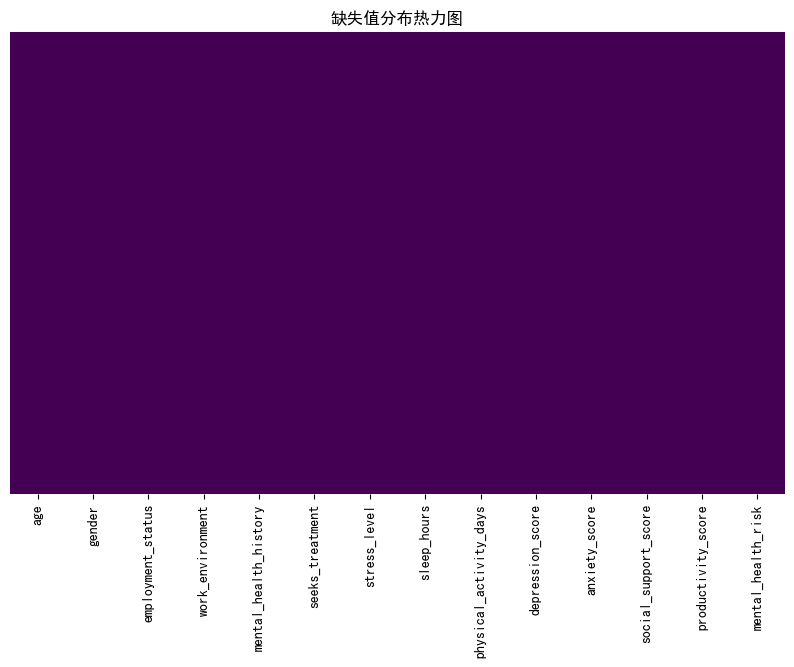

In [13]:
# 统计每个列的缺失值数量和比例
missing_stats = pd.DataFrame({
    '缺失值数量': df.isnull().sum(),
    '缺失值比例': df.isnull().sum() / len(df) * 100
})

# 按缺失值数量降序排序
missing_stats = missing_stats.sort_values('缺失值数量', ascending=False)

# 只显示有缺失值的列
print('缺失值统计：')
print(missing_stats[missing_stats['缺失值数量'] > 0])

# 绘制缺失值热力图
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('缺失值分布热力图')
plt.show()

#### 2.1.2 异常值分析

数值型变量的基本统计量：
                age  stress_level   sleep_hours  physical_activity_days  \
count  10000.000000  10000.000000  10000.000000            10000.000000   
mean      41.557600      5.572000      6.473000                3.505700   
std       13.749581      2.887741      1.473944                2.282737   
min       18.000000      1.000000      3.000000                0.000000   
25%       30.000000      3.000000      5.500000                2.000000   
50%       41.500000      6.000000      6.500000                4.000000   
75%       53.000000      8.000000      7.500000                5.000000   
max       65.000000     10.000000     10.000000                7.000000   

       depression_score  anxiety_score  social_support_score  \
count      10000.000000    10000.00000          10000.000000   
mean          15.039900       10.56180             50.117700   
std            8.990839        6.32264             29.229278   
min            0.000000        0.00000              0.0

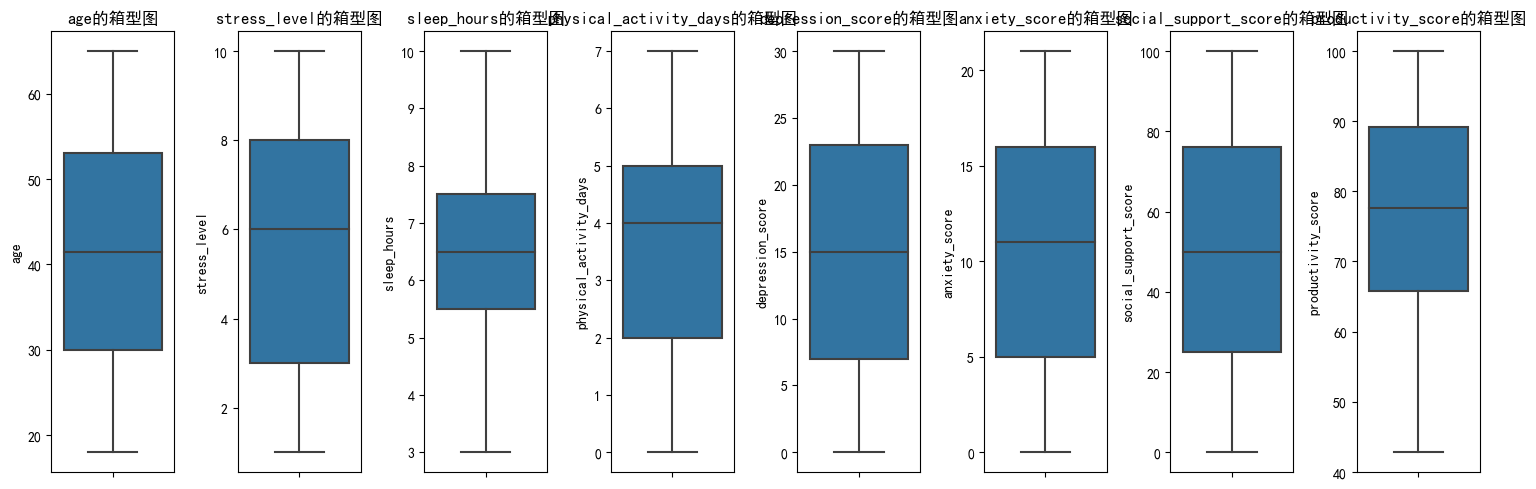


异常值统计：

age:
异常值数量: 0
下界: -4.50
上界: 87.50

stress_level:
异常值数量: 0
下界: -4.50
上界: 15.50

sleep_hours:
异常值数量: 0
下界: 2.50
上界: 10.50

physical_activity_days:
异常值数量: 0
下界: -2.50
上界: 9.50

depression_score:
异常值数量: 0
下界: -17.00
上界: 47.00

anxiety_score:
异常值数量: 0
下界: -11.50
上界: 32.50

social_support_score:
异常值数量: 0
下界: -51.50
上界: 152.50

productivity_score:
异常值数量: 0
下界: 30.70
上界: 124.30


In [14]:
# 获取数值型列
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# 计算基本统计量
print('数值型变量的基本统计量：')
print(df[numeric_columns].describe())

# 使用箱型图检测异常值
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=df[column])
    plt.title(f'{column}的箱型图')
plt.tight_layout()
plt.show()

# 计算异常值
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# 输出每个数值列的异常值统计
print('\n异常值统计：')
for column in numeric_columns:
    n_outliers, lower, upper = detect_outliers(df, column)
    print(f'\n{column}:')
    print(f'异常值数量: {n_outliers}')
    print(f'下界: {lower:.2f}')
    print(f'上界: {upper:.2f}')

### 2.2 类别变量分布图

#### 2.2.1 目标变量分析：

- **心理健康风险**
  - 注意事项：如果某一类 <10%，极易导致模型忽略该类 → 需要重采样！

Mental Health Risk Distribution:
        Count  Percentage(%)
Medium   5892          58.92
High     2369          23.69
Low      1739          17.39


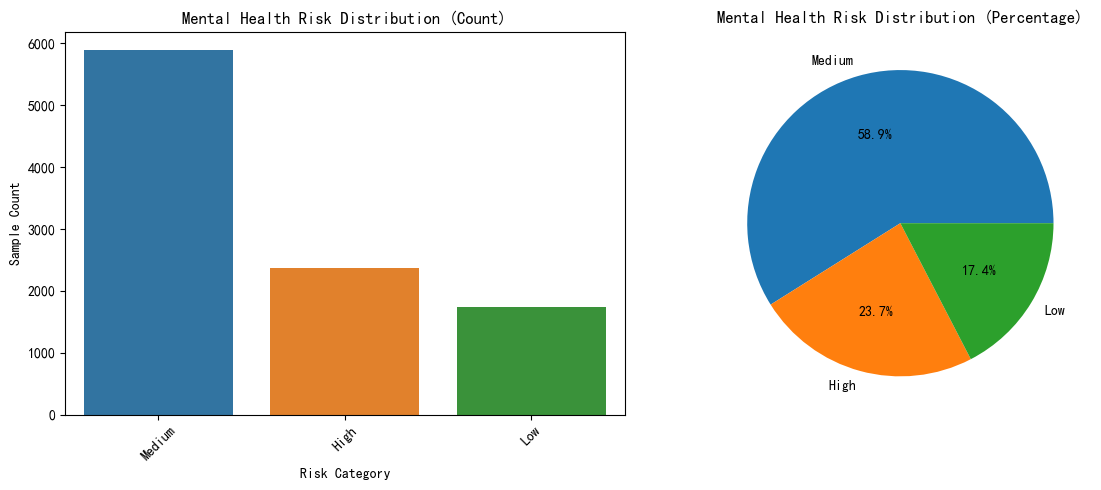

In [15]:
# 分析心理健康风险分类分布
# 计算每个类别的数量和比例
risk_distribution = df['mental_health_risk'].value_counts()
risk_percentage = df['mental_health_risk'].value_counts(normalize=True) * 100

# 创建一个显示分布情况的数据框
risk_stats = pd.DataFrame({
    'Count': risk_distribution,
    'Percentage(%)': risk_percentage
})

# 打印分布统计
print('Mental Health Risk Distribution:')
print(risk_stats)

# 创建图形
plt.figure(figsize=(12, 5))

# 子图1：条形图
plt.subplot(1, 2, 1)
sns.barplot(x=risk_distribution.index, y=risk_distribution.values)
plt.title('Mental Health Risk Distribution (Count)')
plt.xlabel('Risk Category')
plt.ylabel('Sample Count')
plt.xticks(rotation=45)

# 子图2：饼图
plt.subplot(1, 2, 2)
plt.pie(risk_percentage, labels=risk_percentage.index, autopct='%1.1f%%')
plt.title('Mental Health Risk Distribution (Percentage)')

plt.tight_layout()
plt.show()

# 检查是否存在类别不平衡（小于10%的类别）
imbalanced_classes = risk_percentage[risk_percentage < 10]
if not imbalanced_classes.empty:
    print('\nWarning: The following categories have less than 10% samples and may need resampling:')
    print(imbalanced_classes)


#### 2.2.2 输入变量分析：

- **性别**
  - 关注重点：女性占比是否远大于男性（性别偏倚）

- **就业状况**
  - 关注重点：检查"学生/自由职业者"是否极度稀缺

- **工作环境**
  - 关注重点：检查传统办公、远程办公、混合办公是否均衡

- **精神病史**
  - 关注重点："有病史"和"无病史"的占比是否不均

- **寻求治疗**
  - 关注重点：是否接受治疗的样本是否均衡观察


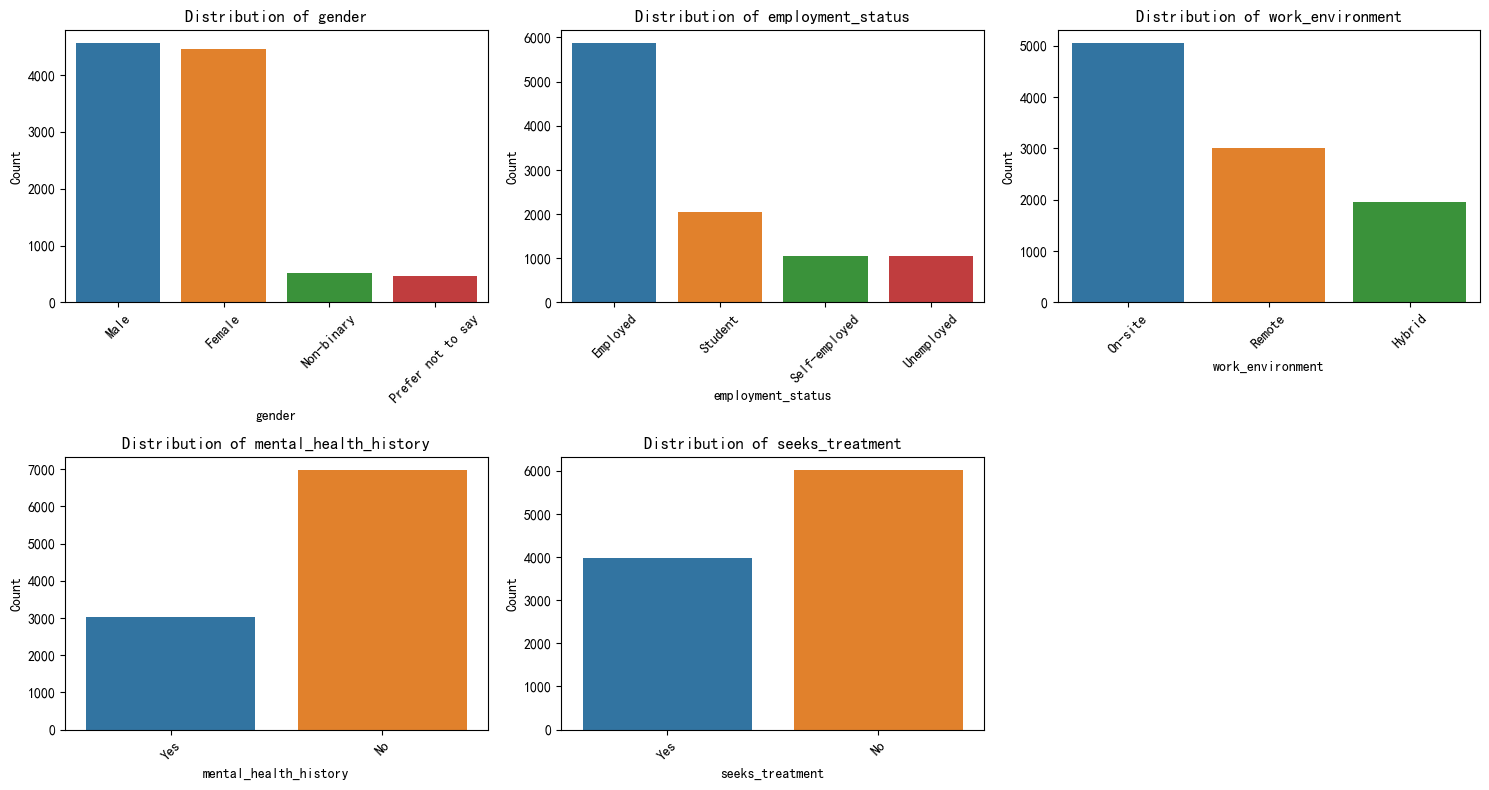


=== 类别变量分布统计 ===

gender 分布:
                   Count  Percentage(%)
Male                4557          45.57
Female              4457          44.57
Non-binary           520           5.20
Prefer not to say    466           4.66

gender中的少数类别 (<10%):
Non-binary           5.20
Prefer not to say    4.66
Name: gender, dtype: float64

employment_status 分布:
               Count  Percentage(%)
Employed        5868          58.68
Student         2043          20.43
Self-employed   1045          10.45
Unemployed      1044          10.44

work_environment 分布:
         Count  Percentage(%)
On-site   5044          50.44
Remote    3009          30.09
Hybrid    1947          19.47

mental_health_history 分布:
     Count  Percentage(%)
No    6969          69.69
Yes   3031          30.31

seeks_treatment 分布:
     Count  Percentage(%)
No    6012          60.12
Yes   3988          39.88

=== 类别变量分布总结 ===
1. 性别分布:
   - 男性: 45.6%, 女性: 44.6%
   - 性别偏倚: 1.0%
   - 结论: 性别分布相对均衡

2. 就业状况:
   - 学生: 20.4%, 自由职业者

In [24]:
# 2.2 类别变量分布图
# Visualize categorical feature distributions
cat_cols = ['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment']
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 打印每个类别变量的详细统计信息
print("\n=== 类别变量分布统计 ===")
for col in cat_cols:
    print(f"\n{col} 分布:")
    value_counts = df[col].value_counts()
    percentage = df[col].value_counts(normalize=True) * 100
    stats_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage(%)': percentage
    })
    print(stats_df)
    
    # 检查是否存在类别不平衡
    imbalanced = percentage[percentage < 10]
    if not imbalanced.empty:
        print(f"\n{col}中的少数类别 (<10%):")
        print(imbalanced)

# 总结类别变量的分布情况
print("\n=== 类别变量分布总结 ===")

# 1. 性别分布总结
gender_pct = df['gender'].value_counts(normalize=True) * 100
male_pct = gender_pct.get('Male', 0)
female_pct = gender_pct.get('Female', 0)
gender_bias = abs(male_pct - female_pct)
print(f"1. 性别分布:")
print(f"   - 男性: {male_pct:.1f}%, 女性: {female_pct:.1f}%")
print(f"   - 性别偏倚: {gender_bias:.1f}%")
print(f"   - 结论: {'存在明显性别偏倚' if gender_bias > 10 else '性别分布相对均衡'}")

# 2. 就业状况总结
emp_pct = df['employment_status'].value_counts(normalize=True) * 100
student_pct = emp_pct.get('Student', 0)
self_emp_pct = emp_pct.get('Self-employed', 0)
print(f"\n2. 就业状况:")
print(f"   - 学生: {student_pct:.1f}%, 自由职业者: {self_emp_pct:.1f}%")
print(f"   - 结论: {'学生/自由职业者样本不足' if (student_pct < 10 or self_emp_pct < 10) else '各就业类别样本充足'}")

# 3. 工作环境总结
work_pct = df['work_environment'].value_counts(normalize=True) * 100
onsite_pct = work_pct.get('On-site', 0)
remote_pct = work_pct.get('Remote', 0)
hybrid_pct = work_pct.get('Hybrid', 0)
print(f"\n3. 工作环境:")
print(f"   - 传统办公: {onsite_pct:.1f}%, 远程办公: {remote_pct:.1f}%, 混合办公: {hybrid_pct:.1f}%")
max_diff = max(onsite_pct, remote_pct, hybrid_pct) - min(onsite_pct, remote_pct, hybrid_pct)
print(f"   - 最大差异: {max_diff:.1f}%")
print(f"   - 结论: {'工作环境分布不均衡' if max_diff > 20 else '工作环境分布相对均衡'}")

# 4. 精神病史总结
history_pct = df['mental_health_history'].value_counts(normalize=True) * 100
yes_history_pct = history_pct.get('Yes', 0)
no_history_pct = history_pct.get('No', 0)
print(f"\n4. 精神病史:")
print(f"   - 有病史: {yes_history_pct:.1f}%, 无病史: {no_history_pct:.1f}%")
history_diff = abs(yes_history_pct - no_history_pct)
print(f"   - 差异: {history_diff:.1f}%")
print(f"   - 结论: {'病史分布极不均衡' if history_diff > 30 else '病史分布不均衡' if history_diff > 15 else '病史分布相对均衡'}")

# 5. 寻求治疗总结
treatment_pct = df['seeks_treatment'].value_counts(normalize=True) * 100
yes_treatment_pct = treatment_pct.get('Yes', 0)
no_treatment_pct = treatment_pct.get('No', 0)
print(f"\n5. 寻求治疗:")
print(f"   - 寻求治疗: {yes_treatment_pct:.1f}%, 不寻求治疗: {no_treatment_pct:.1f}%")
treatment_diff = abs(yes_treatment_pct - no_treatment_pct)
print(f"   - 差异: {treatment_diff:.1f}%")
print(f"   - 结论: {'治疗寻求行为分布极不均衡' if treatment_diff > 30 else '治疗寻求行为分布不均衡' if treatment_diff > 15 else '治疗寻求行为分布相对均衡'}")

# 类别变量分析总结与数据预处理建议

## 分析总结

根据对五个类别变量（性别、就业状况、工作环境、精神病史、寻求治疗）的分析结果，可以得出以下关键发现：

1. **性别分布**：
   - 男性(45.6%)和女性(44.6%)分布均衡，性别偏倚仅1.0%
   - 存在明显的少数类别：非二元性别(5.2%)和不愿透露(4.7%)均低于10%

2. **就业状况**：
   - 各类别样本数量充足，均超过10%
   - 就业者(58.7%)构成主体，学生(20.4%)、自由职业者(10.5%)和失业者(10.4%)比例合理

3. **工作环境**：
   - 存在较大分布差异(最大31.0%)
   - 传统办公(50.4%)占比最高，远程办公(30.1%)和混合办公(19.5%)比例偏低但可接受

4. **精神病史**：
   - 分布极不均衡，差异高达39.4%
   - 无病史样本(69.7%)远多于有病史样本(30.3%)

5. **寻求治疗**：
   - 分布不均衡，差异为20.2%
   - 不寻求治疗者(60.1%)显著多于寻求治疗者(39.9%)

## 数据预处理建议

基于以上分析，针对每个变量提出以下数据预处理建议：

### 1. 性别变量处理

- **问题**：非二元性别和不愿透露类别占比低于10%
- **建议**：
  - **方案A**：采用分层抽样(Stratified Sampling)确保测试集包含足够的少数类别样本
  - **方案B**：对这两个少数类别进行SMOTE过采样或类似技术增加样本量
  - **方案C**：考虑将这两个类别合并为"其他"类别，以增加样本比例
  - **编码方式**：使用独热编码(One-Hot Encoding)处理，避免引入数值大小的隐含关系

### 2. 就业状况处理

- **问题**：分布相对均衡，无明显问题
- **建议**：
  - 直接使用独热编码处理
  - 无需额外的平衡处理

### 3. 工作环境处理

- **问题**：存在一定程度的不均衡，但各类别样本量充足
- **建议**：
  - 直接使用独热编码处理
  - 在分析相关性和构建模型时关注这一变量的表现
  - 考虑使用类别权重(class_weight)调整模型训练

### 4. 精神病史处理

- **问题**：严重不均衡(69.7% vs 30.3%)
- **建议**：
  - **方法A**：使用随机下采样减少多数类(无病史)样本，或SMOTE过采样增加少数类(有病史)样本
  - **方法B**：采用集成学习方法，如在多个下采样子集上训练多个模型
  - **方法C**：在模型训练中使用类别权重平衡影响
  - 编码：由于是二分类变量，可以直接使用0/1编码

### 5. 寻求治疗处理

- **问题**：存在中等程度的不均衡(60.1% vs 39.9%)
- **建议**：
  - 使用轻度的数据平衡技术，如类别权重调整
  - 编码：作为二分类变量，直接使用0/1编码
  - 分析该变量与精神病史变量的关联性，考虑创建交互特征

### 综合建议

1. **类别不平衡处理**：
   - 对性别变量和精神病史变量采用重采样或加权技术
   - 优先考虑SMOTE、类别权重、分层抽样等方法

2. **特征工程**：
   - 创建交互特征：特别是精神病史与寻求治疗之间可能存在的交互关系
   - 考虑对部分类别变量进行分组或合并

3. **编码策略**：
   - 多类别变量(性别、就业状况、工作环境)：使用独热编码
   - 二分类变量(精神病史、寻求治疗)：使用0/1编码

4. **建模考量**：
   - 选择对类别不平衡不敏感的算法，如随机森林
   - 使用适当的评估指标，如F1-score或AUC，而非简单准确率
   - 对不同类别变量的不平衡程度采用不同强度的处理方法

通过这些有针对性的预处理步骤，可以有效减轻类别不平衡带来的影响，提高模型的泛化能力和预测性能。


### 2.3 数值变量分布图

目的：识别数值型变量的异常值、偏态性、是否标准化

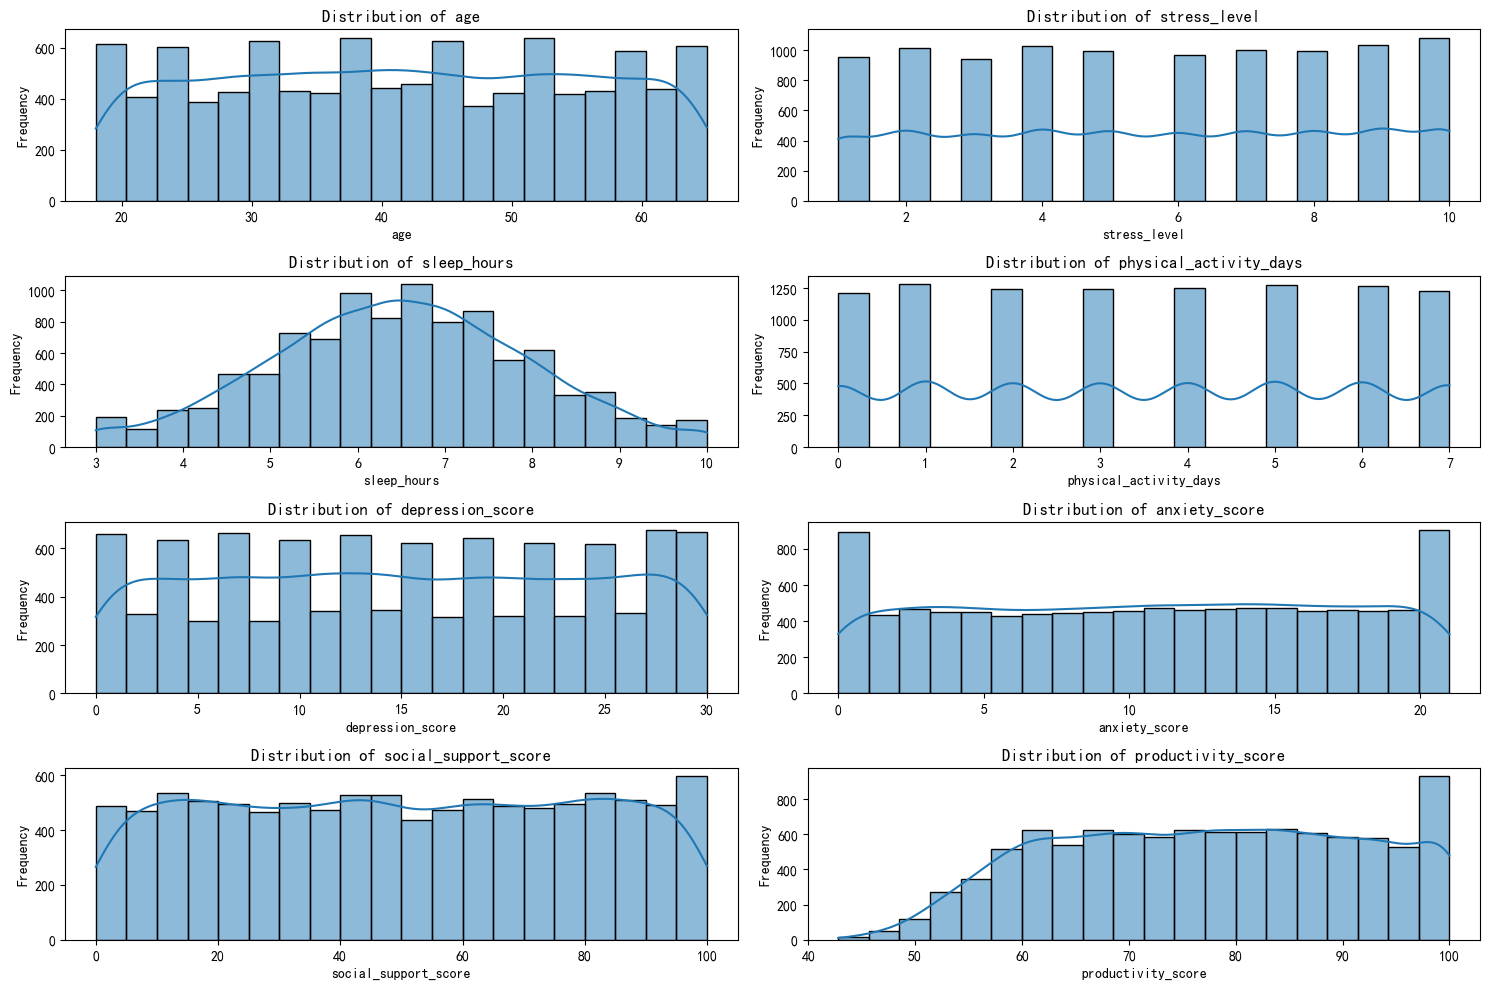

In [25]:
# Visualize numerical feature distributions
num_cols = ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 
            'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

=== 数值变量统计量 ===
                         Mean  Median    Std  Skewness  Kurtosis  Range   IQR
age                     41.56    41.5  13.75     -0.00     -1.18   47.0  23.0
stress_level             5.57     6.0   2.89     -0.02     -1.24    9.0   5.0
sleep_hours              6.47     6.5   1.47     -0.00     -0.32    7.0   2.0
physical_activity_days   3.51     4.0   2.28     -0.00     -1.24    7.0   3.0
depression_score        15.04    15.0   8.99      0.00     -1.20   30.0  16.0
anxiety_score           10.56    11.0   6.32     -0.02     -1.20   21.0  11.0
social_support_score    50.12    50.0  29.23     -0.00     -1.21  100.0  51.0
productivity_score      77.31    77.6  14.06     -0.08     -1.05   57.2  23.4


C:\Users\ranxi\AppData\Local\Temp\ipykernel_50168\2790497100.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


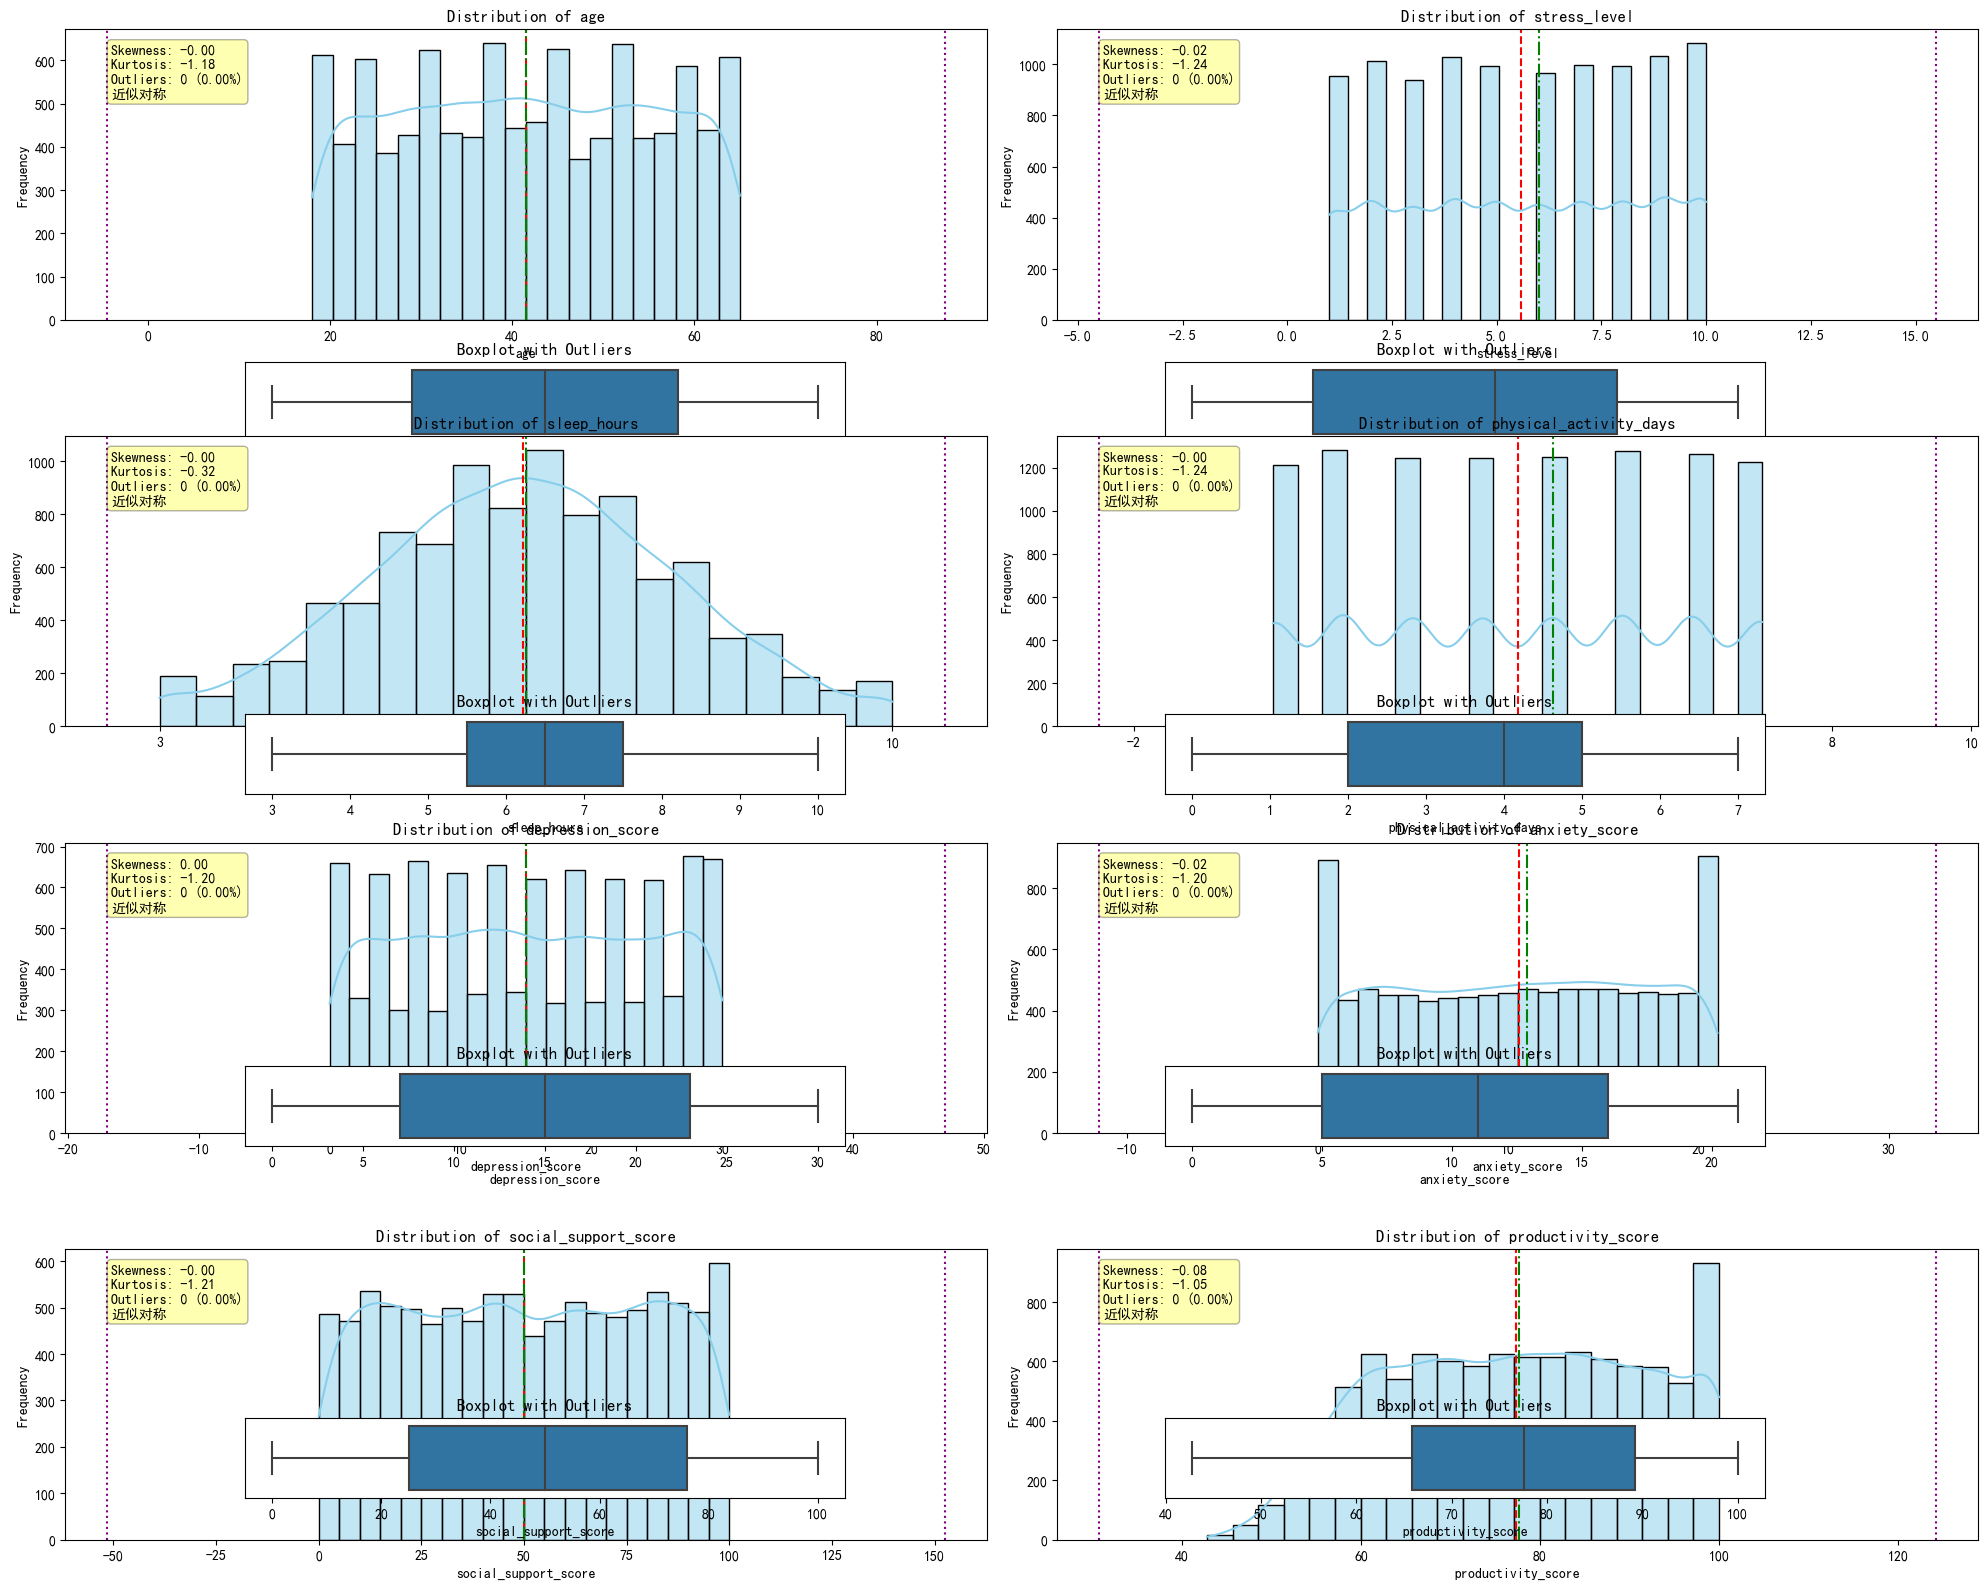


=== 标准化需求分析 ===
各变量尺度范围与标准差比较：
                         最小值    最大值     范围        标准差
social_support_score     0.0  100.0  100.0  29.229278
productivity_score      42.8  100.0   57.2  14.061202
age                     18.0   65.0   47.0  13.749581
depression_score         0.0   30.0   30.0   8.990839
anxiety_score            0.0   21.0   21.0   6.322640
stress_level             1.0   10.0    9.0   2.887741
sleep_hours              3.0   10.0    7.0   1.473944
physical_activity_days   0.0    7.0    7.0   2.282737

变量是否需要标准化：
age: 是 (范围=47.00)
stress_level: 否 (范围=9.00)
sleep_hours: 否 (范围=7.00)
physical_activity_days: 否 (范围=7.00)
depression_score: 是 (范围=30.00)
anxiety_score: 是 (范围=21.00)
social_support_score: 是 (范围=100.00)
productivity_score: 是 (范围=57.20)


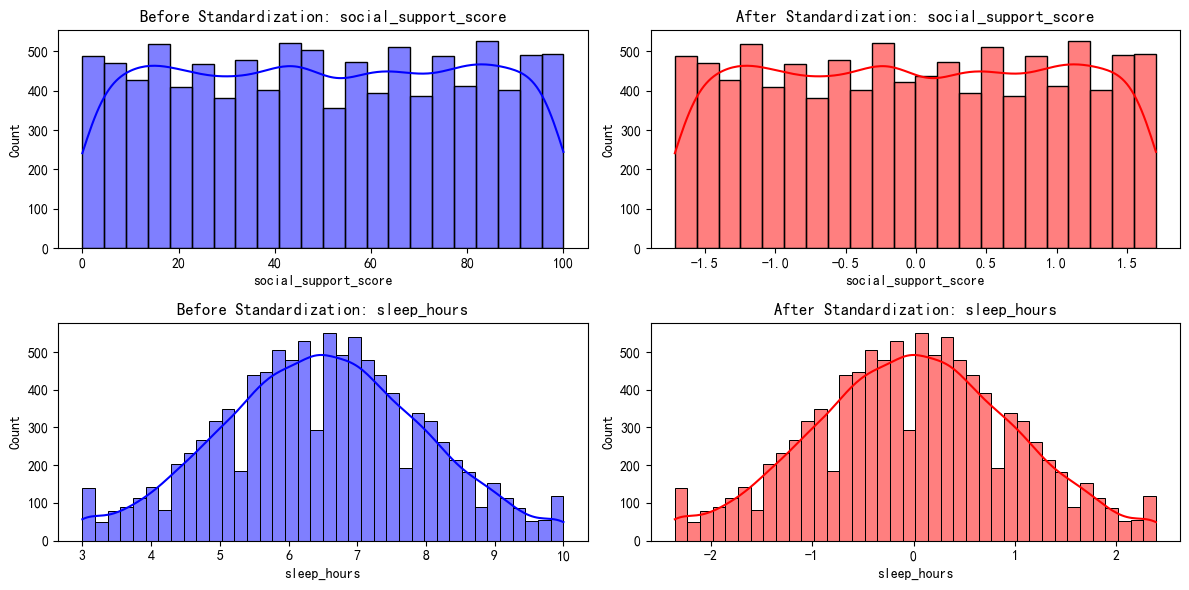


=== 异常值详细分析 ===

age:
  异常值数量: 0
  异常值比例: 0.00%
  异常值界限: [-4.50, 87.50]

stress_level:
  异常值数量: 0
  异常值比例: 0.00%
  异常值界限: [-4.50, 15.50]

sleep_hours:
  异常值数量: 0
  异常值比例: 0.00%
  异常值界限: [2.50, 10.50]

physical_activity_days:
  异常值数量: 0
  异常值比例: 0.00%
  异常值界限: [-2.50, 9.50]

depression_score:
  异常值数量: 0
  异常值比例: 0.00%
  异常值界限: [-17.00, 47.00]

anxiety_score:
  异常值数量: 0
  异常值比例: 0.00%
  异常值界限: [-11.50, 32.50]

social_support_score:
  异常值数量: 0
  异常值比例: 0.00%
  异常值界限: [-51.50, 152.50]

productivity_score:
  异常值数量: 0
  异常值比例: 0.00%
  异常值界限: [30.70, 124.30]


In [28]:
# 2.3 数值变量分布图
# 目的：识别异常值、偏态性、是否标准化

# Visualize numerical feature distributions with enhanced analytics
num_cols = ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 
            'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']

# 创建一个函数来计算偏度和峰度
def get_stats(x):
    return pd.Series({
        'Mean': x.mean(),
        'Median': x.median(),
        'Std': x.std(),
        'Skewness': x.skew(),  # 偏度：衡量分布对称性
        'Kurtosis': x.kurtosis(),  # 峰度：衡量分布尖峭程度
        'Range': x.max() - x.min(),  # 数据范围
        'IQR': x.quantile(0.75) - x.quantile(0.25)  # 四分位距
    })

# 计算各数值变量的统计量
stats_df = df[num_cols].apply(get_stats).T
stats_df = stats_df.round(2)
print("=== 数值变量统计量 ===")
print(stats_df)

# 增强版可视化：直方图+箱型图+统计量
plt.figure(figsize=(20, 16))
for i, col in enumerate(num_cols, 1):
    # 创建主图和共享x轴的子图
    plt.subplot(4, 2, i)
    
    # 绘制直方图和核密度估计
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    
    # 添加垂直均值线和中位数线
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    plt.axvline(df[col].median(), color='green', linestyle='-.', label=f'Median: {df[col].median():.2f}')
    
    # 计算并显示异常值区间
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 添加异常值区间标记
    plt.axvline(lower_bound, color='purple', linestyle=':', label=f'Lower bound: {lower_bound:.2f}')
    plt.axvline(upper_bound, color='purple', linestyle=':', label=f'Upper bound: {upper_bound:.2f}')
    
    # 计算异常值数量和比例
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_pct = len(outliers) / len(df) * 100
    
    # 计算偏度和峰度
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    
    # 设置标题和标签
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # 添加统计信息文本框
    stats_text = (f'Skewness: {skewness:.2f}\n'
                 f'Kurtosis: {kurtosis:.2f}\n'
                 f'Outliers: {len(outliers)} ({outlier_pct:.2f}%)')
    
    # 判断偏态性
    skew_status = ""
    if abs(skewness) < 0.5:
        skew_status = "近似对称"
    elif abs(skewness) < 1:
        skew_status = "轻度偏态" + ("(右偏)" if skewness > 0 else "(左偏)")
    else:
        skew_status = "明显偏态" + ("(右偏)" if skewness > 0 else "(左偏)")
    
    # 在图中添加注释
    plt.annotate(stats_text + f'\n{skew_status}', 
                xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3),
                verticalalignment='top')
    
    # 在主图下方添加箱型图
    plt.axes([0.125 + (i-1)%2 * 0.46, 0.11 + (3-(i-1)//2) * 0.22 - 0.05, 0.3, 0.05])
    sns.boxplot(x=df[col], orient='h')
    plt.title("Boxplot with Outliers")
    plt.yticks([])
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

# 标准化需求分析
print("\n=== 标准化需求分析 ===")
print("各变量尺度范围与标准差比较：")
scale_df = pd.DataFrame({
    '最小值': df[num_cols].min(),
    '最大值': df[num_cols].max(),
    '范围': df[num_cols].max() - df[num_cols].min(),
    '标准差': df[num_cols].std()
})
print(scale_df.sort_values('范围', ascending=False))

# 判断是否需要标准化
need_standardization = []
for col in num_cols:
    range_val = df[col].max() - df[col].min()
    # 基于范围和其他变量比较判断是否需要标准化
    if range_val > 20 or range_val / df[num_cols].median().median() > 5:
        need_standardization.append((col, "是", f"范围={range_val:.2f}"))
    else:
        need_standardization.append((col, "否", f"范围={range_val:.2f}"))

print("\n变量是否需要标准化：")
for col, need, reason in need_standardization:
    print(f"{col}: {need} ({reason})")

# 显示标准化前后的比较（以Z-score为例）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

# 选择一个范围最大的变量和一个范围较小的变量进行对比
plt.figure(figsize=(12, 6))

# 获取范围最大和最小的变量
max_range_var = scale_df.sort_values('范围', ascending=False).index[0]
min_range_var = scale_df.sort_values('范围', ascending=True).index[0]

# 标准化前后对比 - 范围最大的变量
plt.subplot(2, 2, 1)
sns.histplot(df[max_range_var], kde=True, color='blue')
plt.title(f'Before Standardization: {max_range_var}')

plt.subplot(2, 2, 2)
sns.histplot(df_scaled[max_range_var], kde=True, color='red')
plt.title(f'After Standardization: {max_range_var}')

# 标准化前后对比 - 范围较小的变量
plt.subplot(2, 2, 3)
sns.histplot(df[min_range_var], kde=True, color='blue')
plt.title(f'Before Standardization: {min_range_var}')

plt.subplot(2, 2, 4)
sns.histplot(df_scaled[min_range_var], kde=True, color='red')
plt.title(f'After Standardization: {min_range_var}')

plt.tight_layout()
plt.show()

# 异常值详细分析
print("\n=== 异常值详细分析 ===")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_pct = len(outliers) / len(df) * 100
    
    print(f"\n{col}:")
    print(f"  异常值数量: {len(outliers)}")
    print(f"  异常值比例: {outlier_pct:.2f}%")
    print(f"  异常值界限: [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    if len(outliers) > 0:
        print(f"  异常值描述: ")
        print(f"    最小异常值: {outliers.min():.2f}")
        print(f"    最大异常值: {outliers.max():.2f}")
        print(f"    异常值平均: {outliers.mean():.2f}")

#### 2.4变量与目标关系图，判断变量是否有区分度

一个变量如果在不同的心理健康风险分组之间**均值或分布差异显著**，那么它对分类模型来说就是**有价值的变量**。

数值变量：（箱型图）搭配anova方差分析

类别变量：**分类标签堆叠图**：输入变量与心理健康风险的堆叠条形图（交叉关系）搭配卡方检验。

=== 2.4 变量与目标关系分析 ===


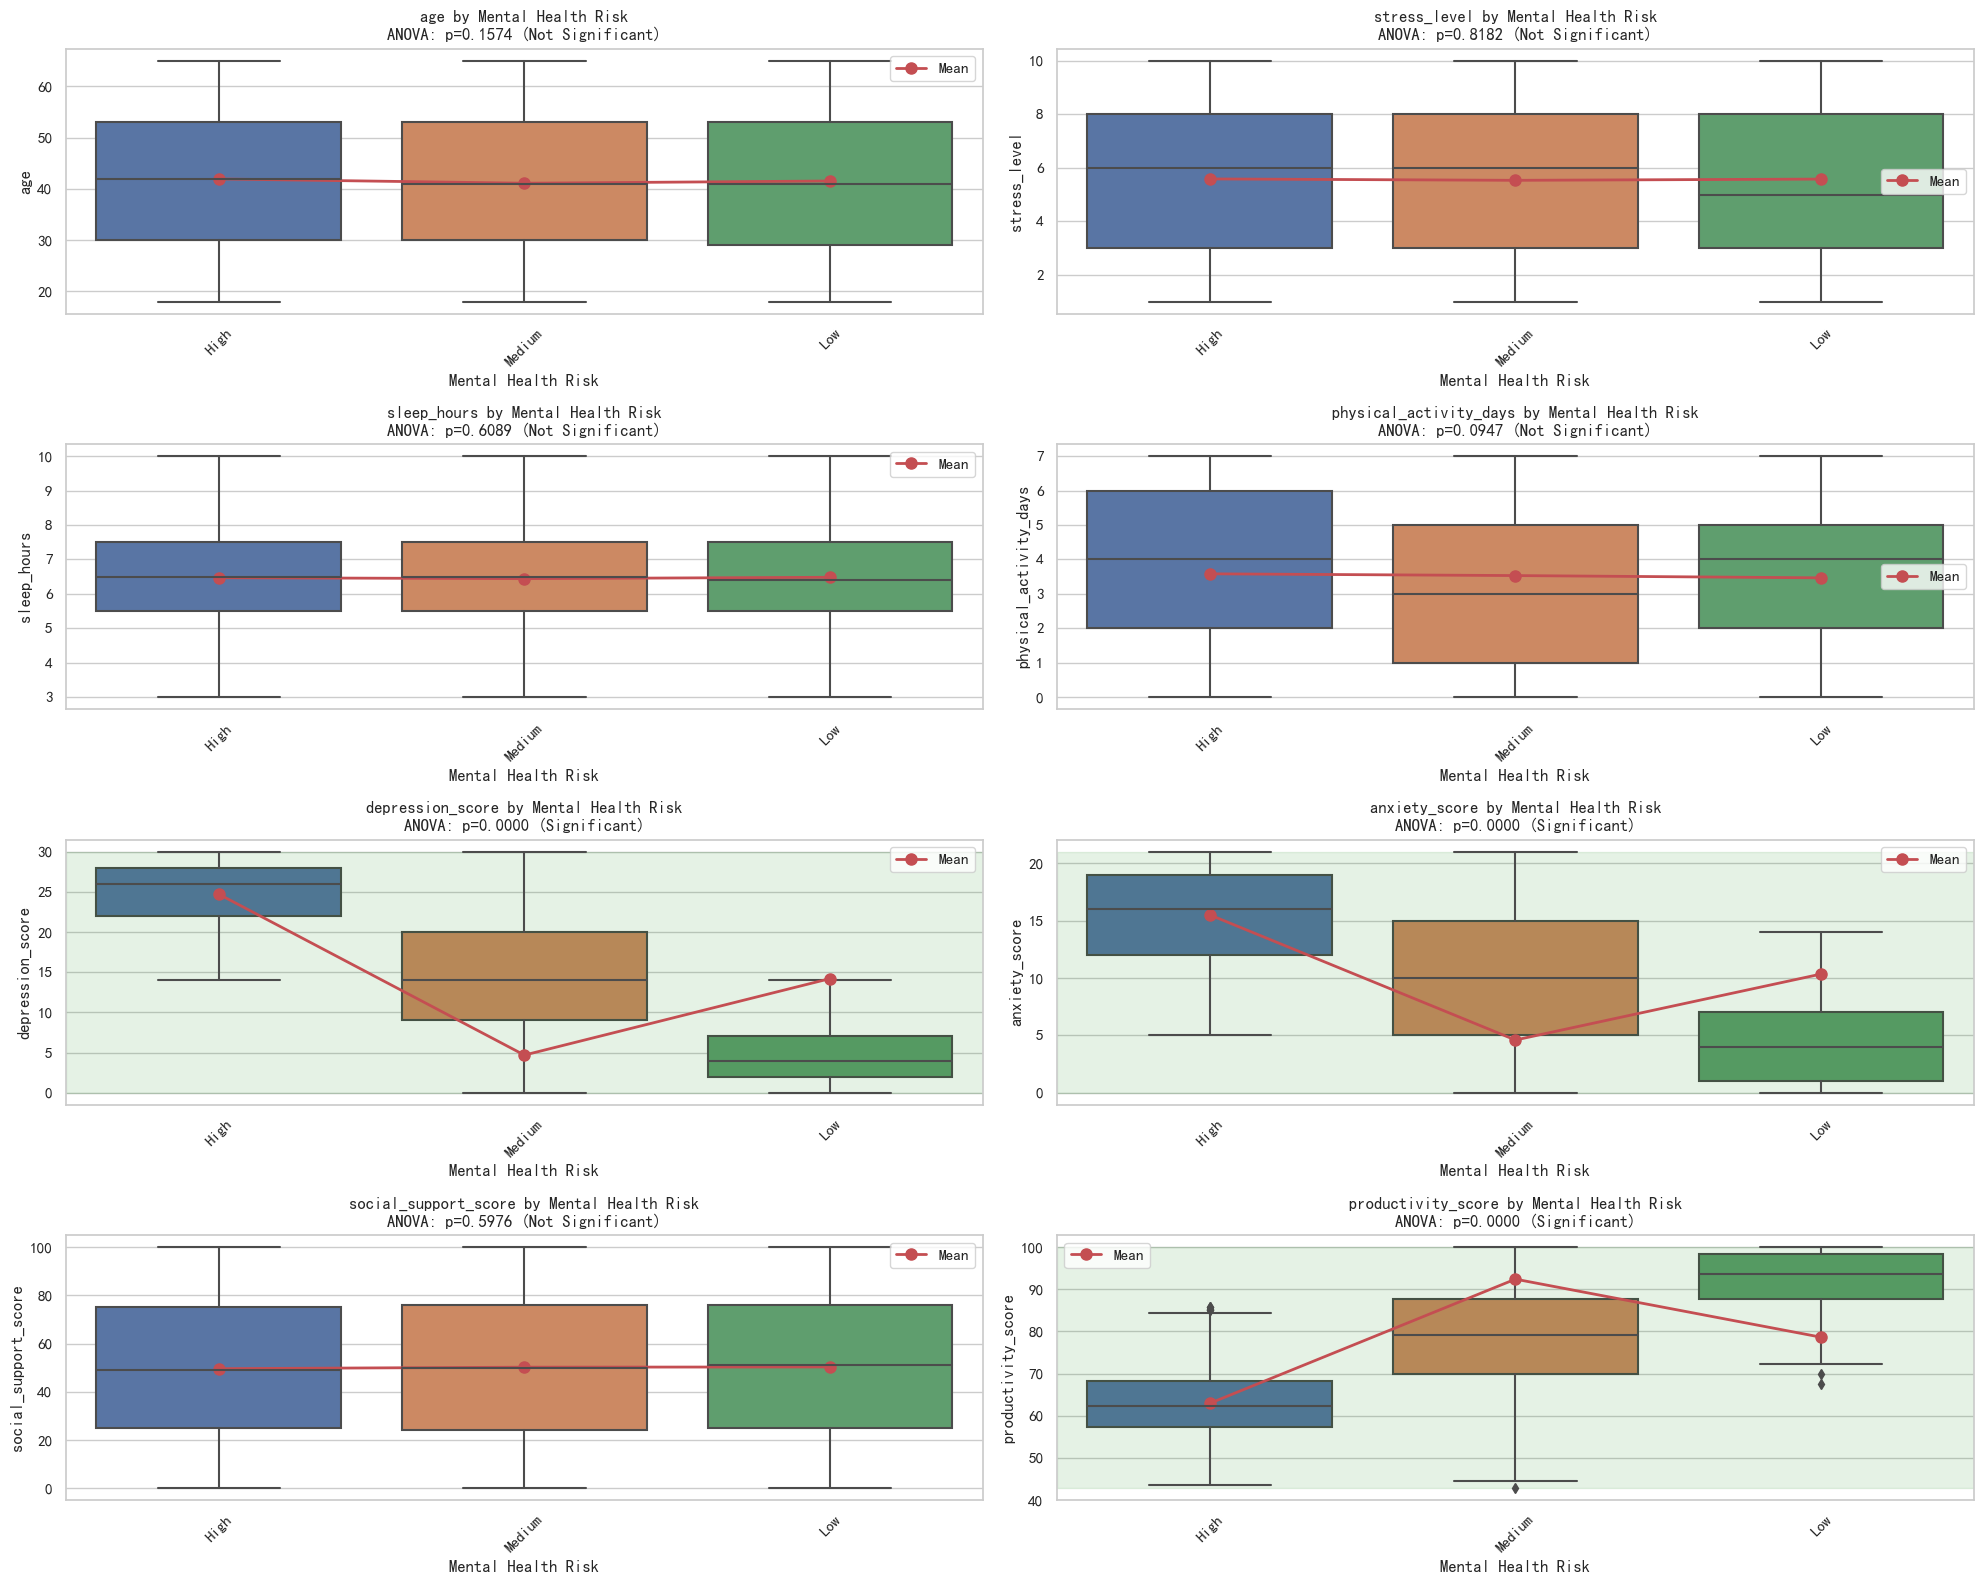


ANOVA分析结果（数值变量与心理健康风险的关系）:
              Variable  F-statistic  p-value  Significant
      depression_score  5214.629007 0.000000         True
         anxiety_score  2146.051046 0.000000         True
    productivity_score  4149.767056 0.000000         True
physical_activity_days     2.357511 0.094708        False
                   age     1.849193 0.157418        False
  social_support_score     0.514897 0.597578        False
           sleep_hours     0.496088 0.608923        False
          stress_level     0.200712 0.818151        False


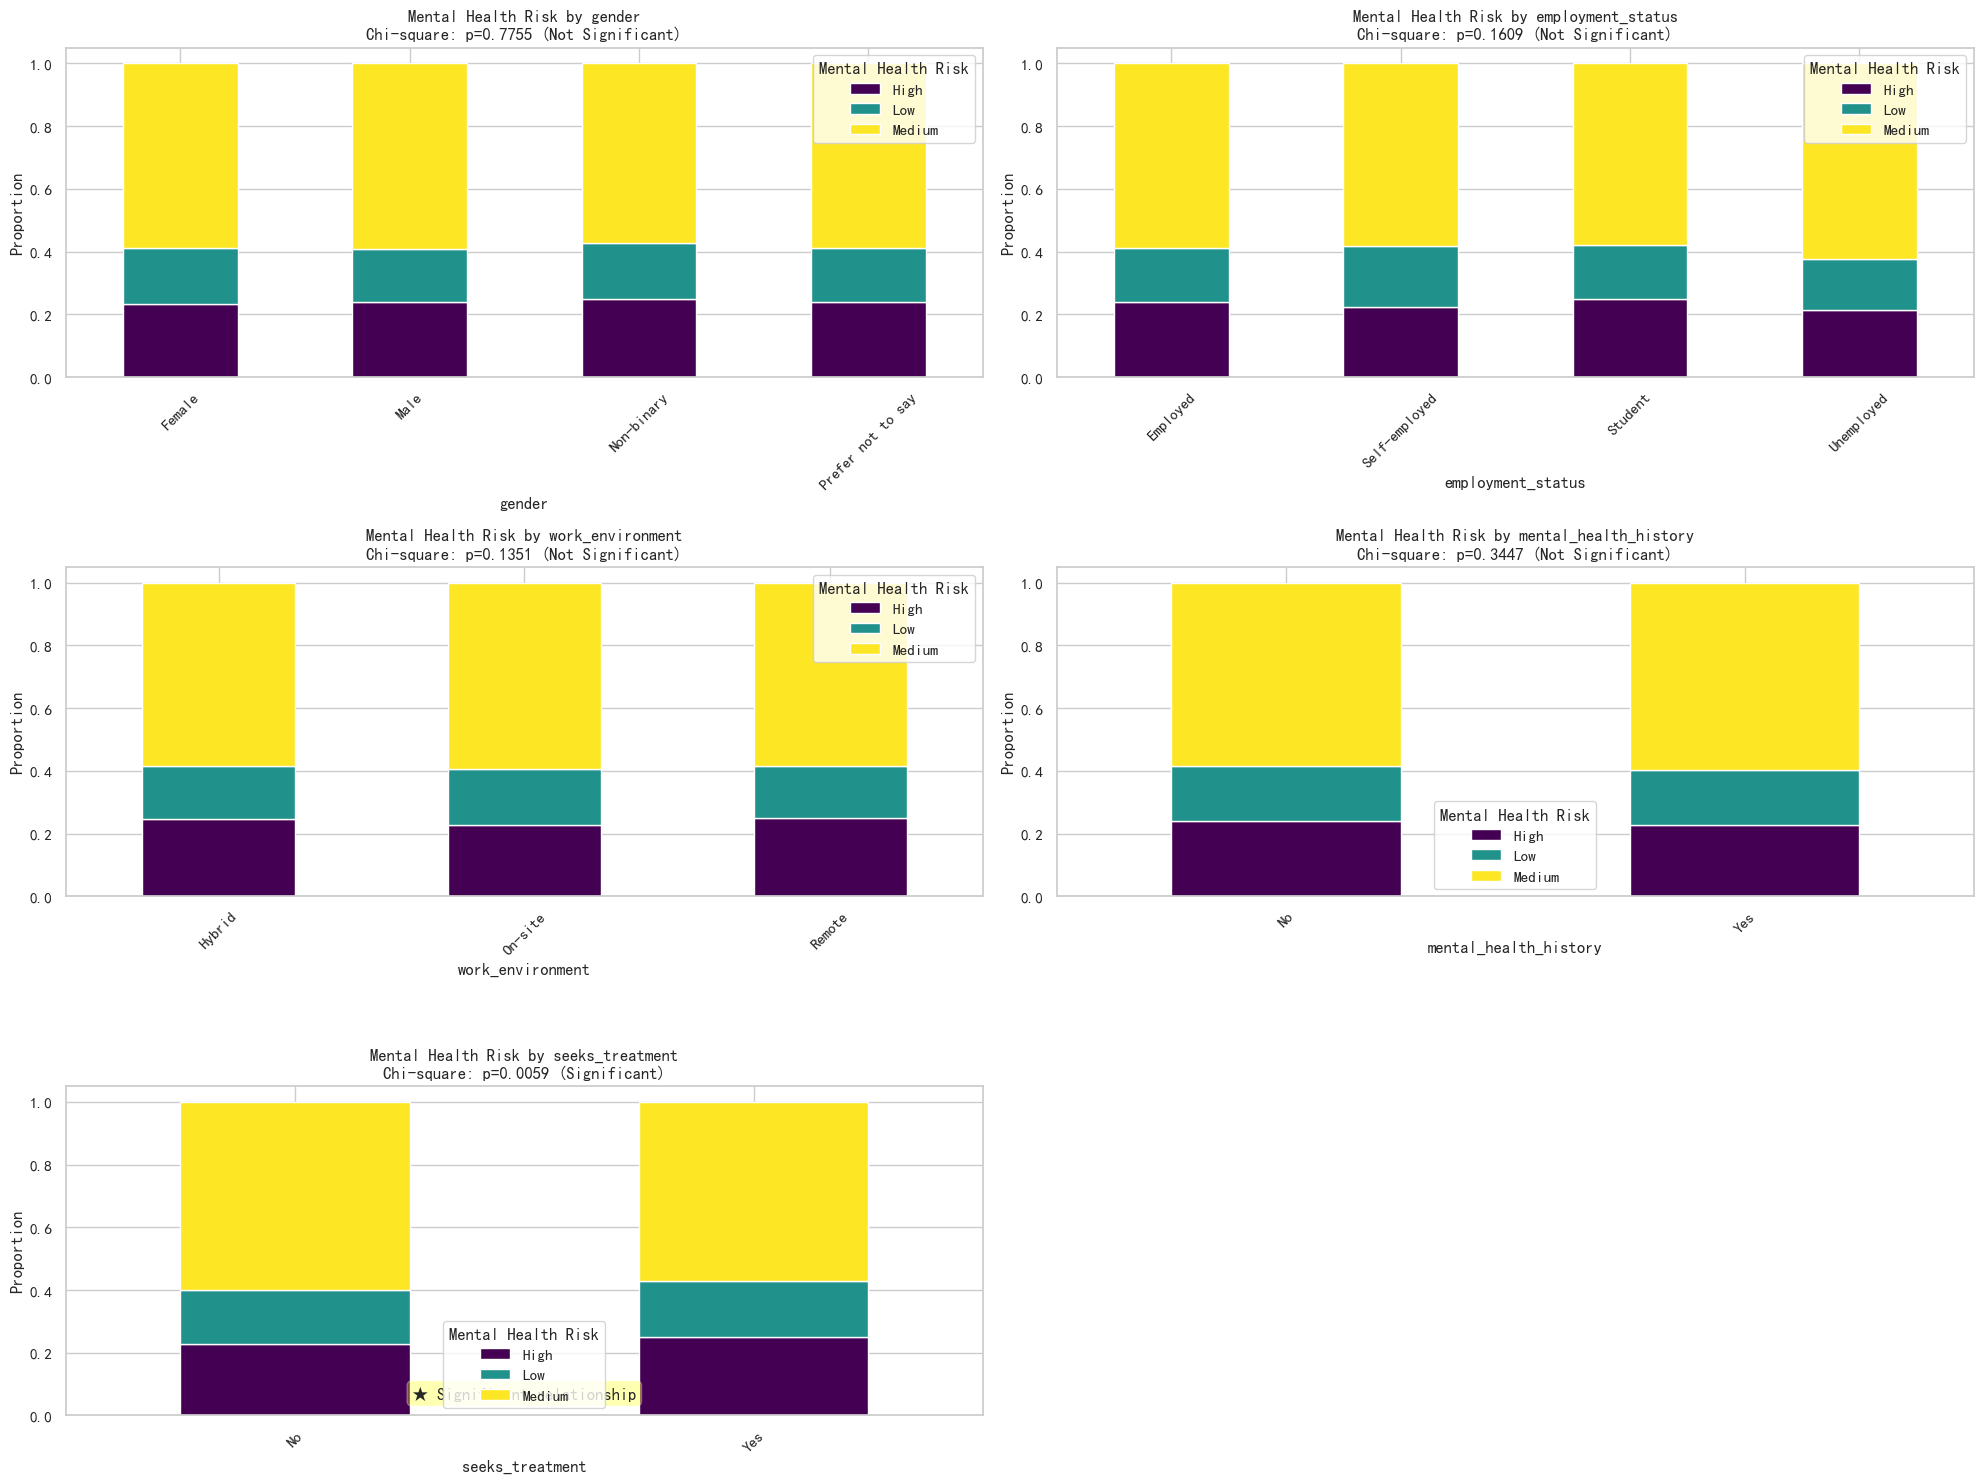


卡方检验结果（类别变量与心理健康风险的关系）:
             Variable  Chi-square  p-value  DoF  Significant
      seeks_treatment   10.269059 0.005890    2         True
     work_environment    7.015266 0.135084    4        False
    employment_status    9.233716 0.160854    6        False
mental_health_history    2.130377 0.344663    2        False
               gender    3.260860 0.775466    6        False

各风险组的数值变量均值比较:
                          age  stress_level  sleep_hours  \
mental_health_risk                                         
High                41.937949      5.584635     6.470283   
Low                 41.106383      5.532490     6.443071   
Medium              41.537848      5.578581     6.482926   

                    physical_activity_days  depression_score  anxiety_score  \
mental_health_risk                                                            
High                              3.583369         24.719713      15.498945   
Low                               3.532490          4.6

c:\Users\ranxi\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


<Figure size 1200x1000 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


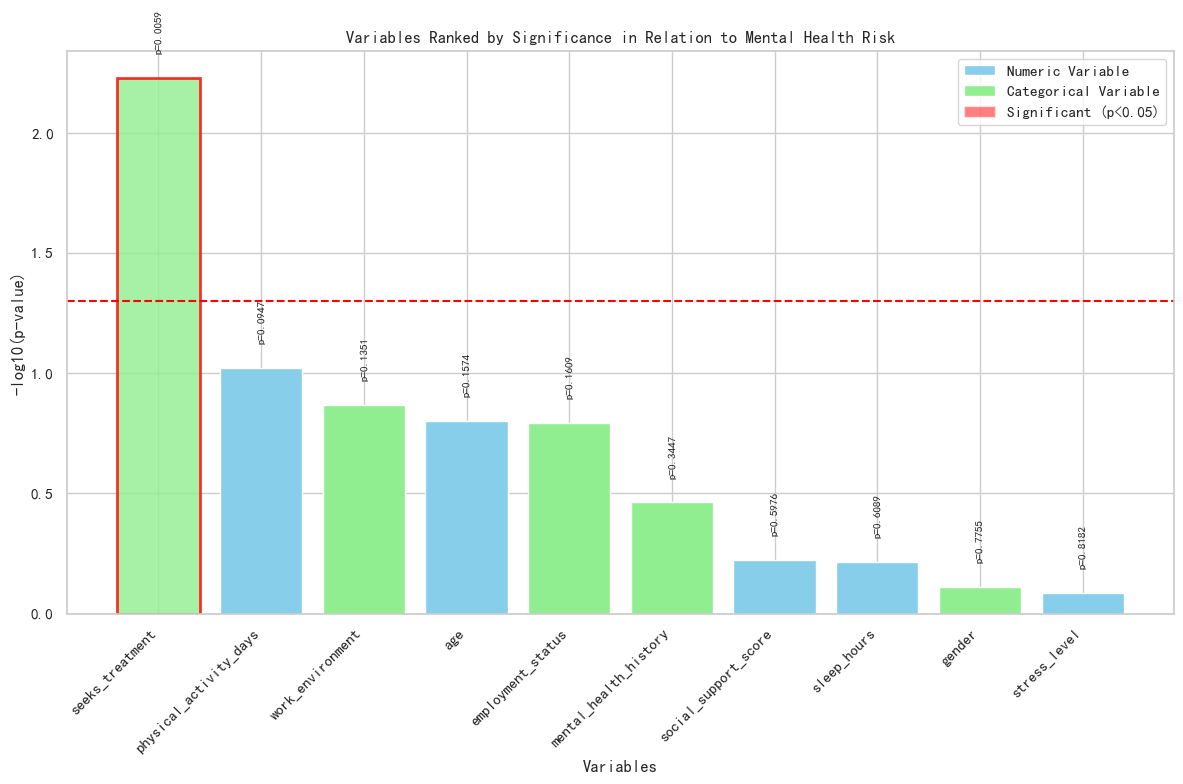


=== 变量对心理健康风险的区分能力总结 ===

显著变量 (p < 0.05):
          Variable  p-value        Type
  depression_score  0.00000     Numeric
     anxiety_score  0.00000     Numeric
productivity_score  0.00000     Numeric
   seeks_treatment  0.00589 Categorical

非显著变量 (p >= 0.05):
              Variable  p-value        Type
physical_activity_days 0.094708     Numeric
      work_environment 0.135084 Categorical
                   age 0.157418     Numeric
     employment_status 0.160854 Categorical
 mental_health_history 0.344663 Categorical
  social_support_score 0.597578     Numeric
           sleep_hours 0.608923     Numeric
                gender 0.775466 Categorical
          stress_level 0.818151     Numeric

数值变量效应量 (Eta-squared):
age: 0.0004
stress_level: 0.0000
sleep_hours: 0.0001
physical_activity_days: 0.0005
depression_score: 0.5106
anxiety_score: 0.3004
social_support_score: 0.0001
productivity_score: 0.4536


In [29]:
# 2.4 变量与目标关系图，判断变量是否有区分度
# 目的：分析哪些变量在不同心理健康风险组别间有显著差异

# 导入必要的库
import scipy.stats as stats
from scipy.stats import f_oneway, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 设置图形风格
sns.set(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

print("=== 2.4 变量与目标关系分析 ===")

# 1. 数值变量与目标变量的关系分析（箱型图+ANOVA）
numeric_cols = ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 
                'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']

# 创建一个DataFrame存储ANOVA结果
anova_results = []

# 可视化数值变量与目标变量的关系
plt.figure(figsize=(20, 16))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, idx)
    
    # 创建箱型图
    ax = sns.boxplot(x='mental_health_risk', y=col, data=df)
    
    # 进行ANOVA检验
    groups = [df[df['mental_health_risk'] == risk][col].dropna() for risk in df['mental_health_risk'].unique()]
    f_stat, p_value = f_oneway(*groups)
    
    # 将结果存储到列表中
    anova_results.append({
        'Variable': col,
        'F-statistic': f_stat,
        'p-value': p_value,
        'Significant': p_value < 0.05
    })
    
    # 设置图形标题和标签
    plt.title(f'{col} by Mental Health Risk\nANOVA: p={p_value:.4f} {"(Significant)" if p_value < 0.05 else "(Not Significant)"}')
    plt.xlabel('Mental Health Risk')
    plt.ylabel(col)
    
    # 旋转x轴标签
    plt.xticks(rotation=45)
    
    # 添加均值点
    means = df.groupby('mental_health_risk')[col].mean()
    ax.plot(range(len(means)), means, 'ro-', linewidth=2, markersize=8, label='Mean')
    ax.legend()
    
    # 如果p值显著，添加不同组之间的比较
    if p_value < 0.05:
        # 添加突出显示
        plt.axhspan(df[col].min(), df[col].max(), alpha=0.1, color='green')

plt.tight_layout()
plt.savefig('numeric_vars_vs_risk.png', dpi=300)  # 保存高分辨率图像
plt.show()

# 创建ANOVA结果表格并排序
anova_df = pd.DataFrame(anova_results).sort_values('p-value')
print("\nANOVA分析结果（数值变量与心理健康风险的关系）:")
print(anova_df.to_string(index=False))

# 2. 类别变量与目标变量的关系分析（堆叠条形图+卡方检验）
categorical_cols = ['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment']

# 创建一个DataFrame存储卡方检验结果
chi2_results = []

# 可视化类别变量与目标变量的关系
plt.figure(figsize=(20, 15))
for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, idx)
    
    # 计算交叉表
    cross_tab = pd.crosstab(df[col], df['mental_health_risk'], normalize='index')
    cross_tab_counts = pd.crosstab(df[col], df['mental_health_risk'])
    
    # 绘制堆叠条形图
    cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
    
    # 进行卡方检验
    chi2, p, dof, expected = chi2_contingency(cross_tab_counts)
    
    # 将结果存储到列表中
    chi2_results.append({
        'Variable': col,
        'Chi-square': chi2,
        'p-value': p,
        'DoF': dof,
        'Significant': p < 0.05
    })
    
    # 设置图形标题和标签
    plt.title(f'Mental Health Risk by {col}\nChi-square: p={p:.4f} {"(Significant)" if p < 0.05 else "(Not Significant)"}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend(title='Mental Health Risk')
    
    # 旋转x轴标签
    plt.xticks(rotation=45)
    
    # 如果p值显著，添加标记
    if p < 0.05:
        plt.text(0.5, 0.05, "★ Significant relationship", 
                 transform=plt.gca().transAxes, ha='center',
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

plt.tight_layout()
plt.savefig('categorical_vars_vs_risk.png', dpi=300)  # 保存高分辨率图像
plt.show()

# 创建卡方检验结果表格并排序
chi2_df = pd.DataFrame(chi2_results).sort_values('p-value')
print("\n卡方检验结果（类别变量与心理健康风险的关系）:")
print(chi2_df.to_string(index=False))

# 3. 额外分析：数值变量在不同风险组别之间的均值比较
# 创建一个显示每个数值变量在不同风险级别下的均值表格
mean_comparison = df.groupby('mental_health_risk')[numeric_cols].mean()
print("\n各风险组的数值变量均值比较:")
print(mean_comparison)

# 可视化各变量对目标的区分能力 - 按统计显著性排序
plt.figure(figsize=(12, 10))

# 合并所有变量的p值
all_p_values = []
for row in anova_results:
    all_p_values.append({
        'Variable': row['Variable'],
        'p-value': row['p-value'],
        'Test': 'ANOVA',
        'Type': 'Numeric'
    })
    
for row in chi2_results:
    all_p_values.append({
        'Variable': row['Variable'],
        'p-value': row['p-value'],
        'Test': 'Chi-square',
        'Type': 'Categorical'
    })

# 创建DataFrame并按p值排序
all_p_df = pd.DataFrame(all_p_values).sort_values('p-value')

# 创建条形图显示p值（取对数以便更好地可视化）
plt.figure(figsize=(12, 8))
log_p = -np.log10(all_p_df['p-value'])
bars = plt.bar(all_p_df['Variable'], log_p, color=[
    'skyblue' if t == 'Numeric' else 'lightgreen' for t in all_p_df['Type']
])

# 添加显著性阈值线
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--', label='Significance Threshold (p=0.05)')

# 添加标签和标题
plt.xlabel('Variables')
plt.ylabel('-log10(p-value)')
plt.title('Variables Ranked by Significance in Relation to Mental Health Risk')
plt.xticks(rotation=45, ha='right')

# 添加注释，显示实际p值
for i, (p, bar) in enumerate(zip(all_p_df['p-value'], bars)):
    plt.text(i, log_p.iloc[i] + 0.1, f'p={p:.4f}', ha='center', va='bottom', rotation=90, fontsize=8)

# 添加图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='skyblue', label='Numeric Variable'),
    Patch(facecolor='lightgreen', label='Categorical Variable'),
    Patch(facecolor='red', alpha=0.5, label='Significant (p<0.05)')
]
plt.legend(handles=legend_elements)

# 高亮显示显著的变量
for i, p in enumerate(all_p_df['p-value']):
    if p < 0.05:
        bars[i].set_alpha(0.8)
        bars[i].set_edgecolor('red')
        bars[i].set_linewidth(2)

plt.tight_layout()
plt.savefig('variable_significance.png', dpi=300)  # 保存高分辨率图像
plt.show()

# 4. 总结各变量的区分能力
print("\n=== 变量对心理健康风险的区分能力总结 ===")
print("\n显著变量 (p < 0.05):")
sig_vars = all_p_df[all_p_df['p-value'] < 0.05].sort_values('p-value')
print(sig_vars[['Variable', 'p-value', 'Type']].to_string(index=False))

print("\n非显著变量 (p >= 0.05):")
nonsig_vars = all_p_df[all_p_df['p-value'] >= 0.05].sort_values('p-value')
print(nonsig_vars[['Variable', 'p-value', 'Type']].to_string(index=False))

# 5. 计算变量的效应量（Effect Size）- 对于ANOVA使用Eta-squared
print("\n数值变量效应量 (Eta-squared):")
for col in numeric_cols:
    # 计算组间和组内平方和
    groups = [df[df['mental_health_risk'] == risk][col].dropna() for risk in df['mental_health_risk'].unique()]
    group_means = [g.mean() for g in groups]
    grand_mean = df[col].mean()
    
    # 组间平方和
    ss_between = sum(len(g) * (m - grand_mean)**2 for g, m in zip(groups, group_means))
    
    # 总平方和
    ss_total = sum((x - grand_mean)**2 for x in df[col].dropna())
    
    # 计算Eta-squared
    eta_squared = ss_between / ss_total if ss_total != 0 else 0
    
    print(f"{col}: {eta_squared:.4f}")

##### 2.5相关性热图：发现变量间的冗余或互斥关系

相关性热图的目的:
1. 发现变量间的相关性强度
2. 识别高度相关的变量对(相关系数>0.7)，考虑删除冗余变量
3. 检查变量与目标变量的相关程度，辅助特征选择

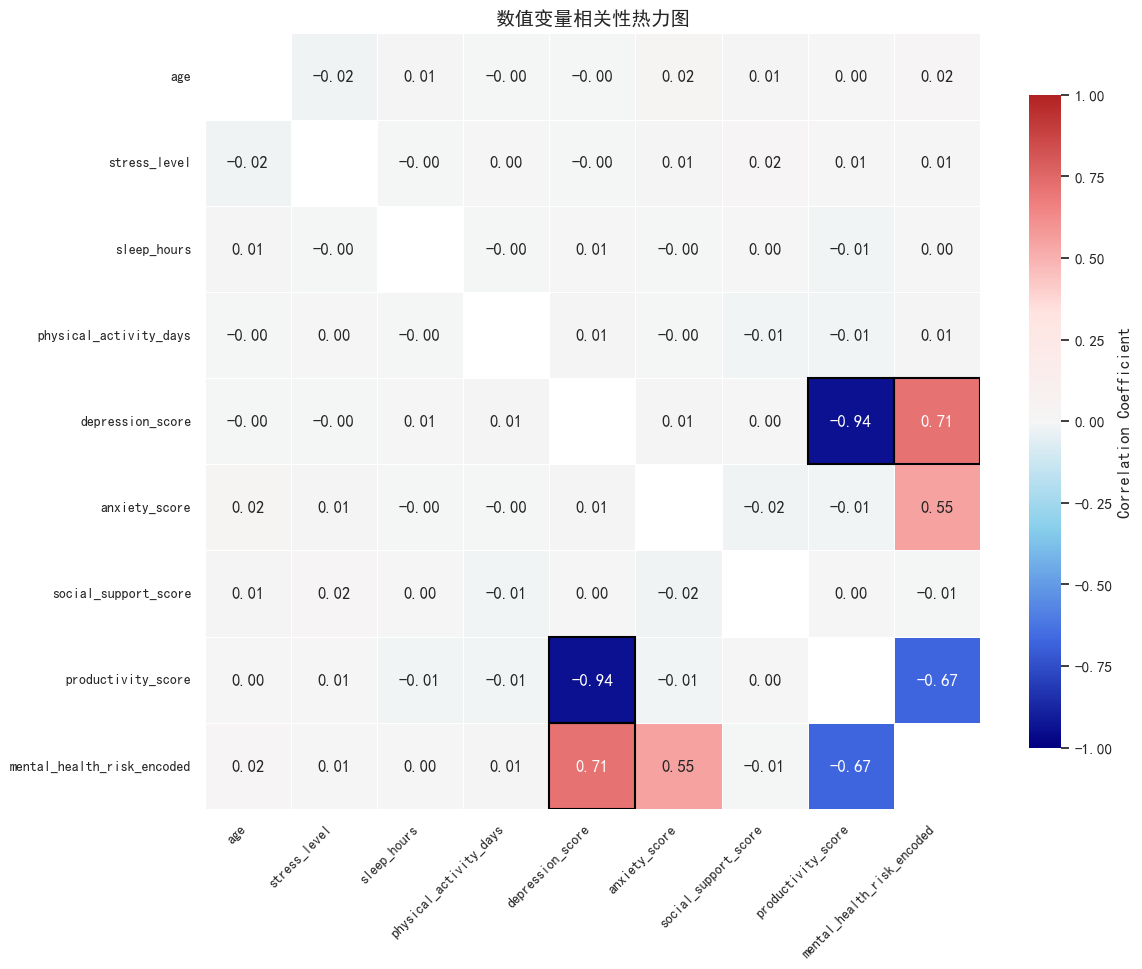

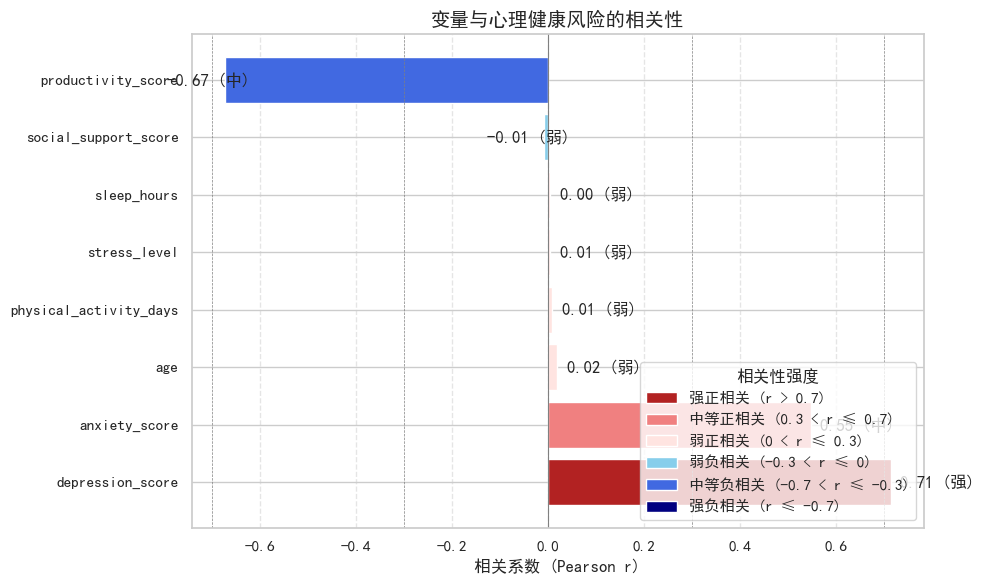

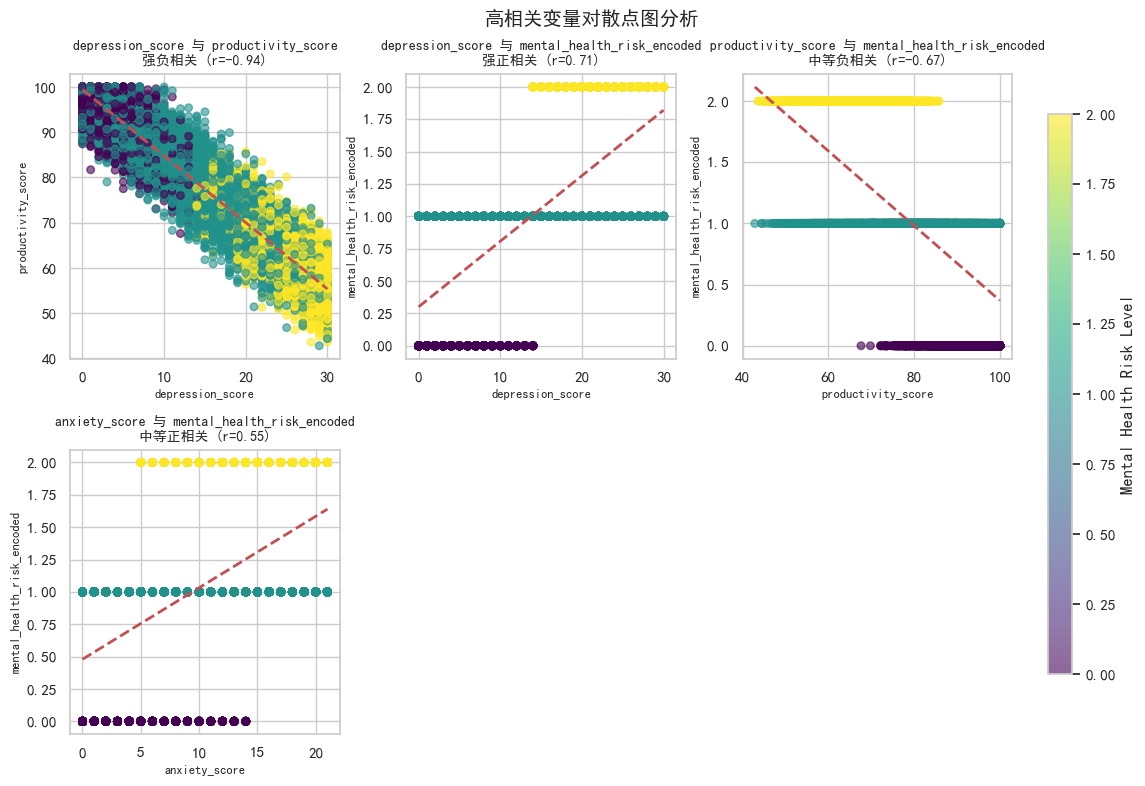

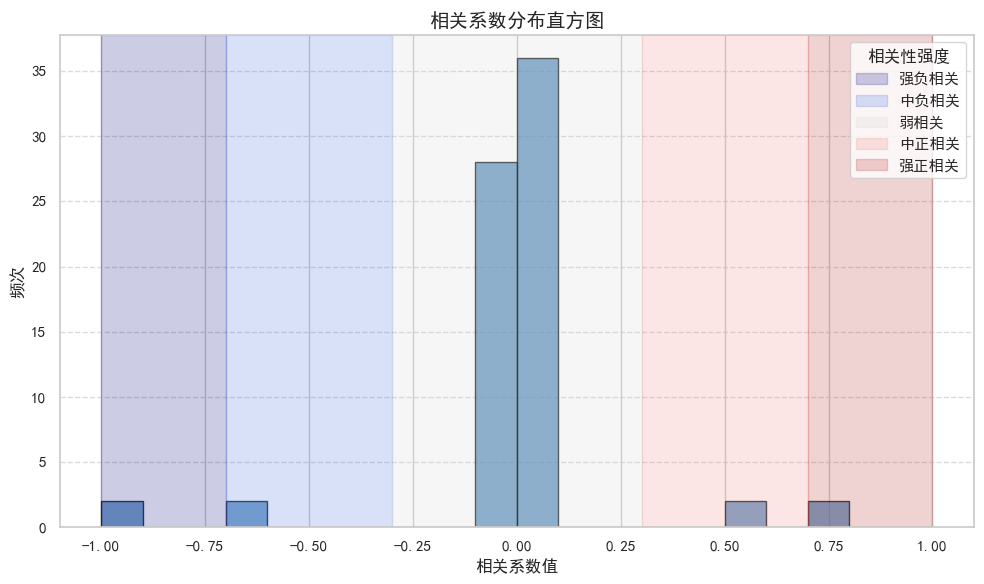


=== 相关性分析关键发现 ===

与心理健康风险相关性最强的变量:
- depression_score: 0.71 (正相关, 强强度)
- anxiety_score: 0.55 (正相关, 中等强度)
- age: 0.02 (正相关, 弱强度)
- physical_activity_days: 0.01 (正相关, 弱强度)
- stress_level: 0.01 (正相关, 弱强度)
- sleep_hours: 0.00 (正相关, 弱强度)
- social_support_score: -0.01 (负相关, 弱强度)
- productivity_score: -0.67 (负相关, 中等强度)

高度相关的变量对 (|r| >= 0.7):
- depression_score & productivity_score: -0.94
  建议: 考虑移除其中一个变量，保留 depression_score (与目标相关性更强)
- depression_score & mental_health_risk_encoded: 0.71
  建议: 监控这两个变量在模型中的表现，可能需要降维处理

中度相关的变量对 (0.5 <= |r| < 0.7):
- productivity_score & mental_health_risk_encoded: -0.67
- anxiety_score & mental_health_risk_encoded: 0.55

整体相关性强度: 0.09
- 整体相关性较弱，变量间相对独立


In [31]:
# 2.5 相关性热图：发现变量间的冗余或互斥关系

# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 准备数据
# 数值型变量
numeric_cols = ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 
                'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score']

# 为了包含目标变量，将其编码为数值
df_corr = df.copy()

# 如果目标变量是分类的，进行编码
if df_corr['mental_health_risk'].dtype == 'object':
    # 创建映射 - 按风险等级排序
    risk_mapping = {
        'Low': 0,
        'Medium': 1,
        'High': 2
    }
    # 应用映射
    df_corr['mental_health_risk_encoded'] = df_corr['mental_health_risk'].map(risk_mapping)
else:
    df_corr['mental_health_risk_encoded'] = df_corr['mental_health_risk']

# 添加目标变量到分析中
analysis_cols = numeric_cols + ['mental_health_risk_encoded']

# 计算相关系数矩阵
correlation_matrix = df_corr[analysis_cols].corr()

# 图1：优化的相关性热力图
plt.figure(figsize=(12, 10))

# 创建自定义颜色映射 - 改用更适合弱相关区域的配色方案
# 使用对比度更强的颜色方案，让弱相关区域更清晰
colors = ["navy", "royalblue", "skyblue", "whitesmoke", "mistyrose", "lightcoral", "firebrick"]
cmap = LinearSegmentedColormap.from_list("custom_diverging", colors, N=256)

# 绘制热力图
mask = np.zeros_like(correlation_matrix)
np.fill_diagonal(mask, True)  # 遮盖对角线上的1值
heatmap = sns.heatmap(correlation_matrix, 
              mask=mask,
              annot=True,  # 显示相关系数值
              fmt=".2f",   # 保留两位小数
              cmap=cmap,
              vmin=-1, vmax=1,
              square=True,
              linewidths=0.5,
              cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

# 设置标题和字体大小
plt.title('数值变量相关性热力图', fontsize=14)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)

# 高亮强相关系数
# 为强相关单元格添加边框
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7 and i != j:
            heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, 
                                          edgecolor='black', lw=1.5))

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

# 图2：与目标变量的相关性条形图
plt.figure(figsize=(10, 6))

# 排除目标变量自身的相关性
target_corr = correlation_matrix['mental_health_risk_encoded'].drop('mental_health_risk_encoded')
target_corr = target_corr.sort_values(ascending=False)

# 创建颜色映射 - 基于相关性强度和方向
colors = []
for val in target_corr:
    if val > 0.7:  # 强正相关
        colors.append('firebrick')
    elif val > 0.3:  # 中等正相关
        colors.append('lightcoral')
    elif val > 0:  # 弱正相关
        colors.append('mistyrose')
    elif val > -0.3:  # 弱负相关
        colors.append('skyblue')
    elif val > -0.7:  # 中等负相关
        colors.append('royalblue')
    else:  # 强负相关
        colors.append('navy')

# 绘制条形图
bars = plt.barh(target_corr.index, target_corr, color=colors)

# 添加参考线
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.8)
plt.axvline(x=0.3, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=-0.3, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=0.7, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=-0.7, color='gray', linestyle='--', linewidth=0.5)

# 添加数值标签
for i, v in enumerate(target_corr):
    strength = ""
    if abs(v) > 0.7:
        strength = "强"
    elif abs(v) > 0.3:
        strength = "中"
    else:
        strength = "弱"
    
    plt.text(v + (0.02 if v >= 0 else -0.12), 
             i, 
             f"{v:.2f} ({strength})", 
             va='center', 
             fontweight='bold' if abs(v) > 0.3 else 'normal')

# 添加标题和标签
plt.title('变量与心理健康风险的相关性', fontsize=14)
plt.xlabel('相关系数 (Pearson r)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 添加图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='firebrick', label='强正相关 (r > 0.7)'),
    Patch(facecolor='lightcoral', label='中等正相关 (0.3 < r ≤ 0.7)'),
    Patch(facecolor='mistyrose', label='弱正相关 (0 < r ≤ 0.3)'),
    Patch(facecolor='skyblue', label='弱负相关 (-0.3 < r ≤ 0)'),
    Patch(facecolor='royalblue', label='中等负相关 (-0.7 < r ≤ -0.3)'),
    Patch(facecolor='navy', label='强负相关 (r ≤ -0.7)')
]
plt.legend(handles=legend_elements, loc='lower right', title='相关性强度')

plt.tight_layout()
plt.savefig('target_correlation.png', dpi=300)
plt.show()

# 图3：高度相关变量对分析
# 提取高度相关的变量对
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= 0.5:  # 降低阈值到0.5，以便找到更多相关对
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((var1, var2, corr_value))

# 根据相关系数绝对值排序
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if high_corr_pairs:
    # 最多显示前6对，避免图形过于拥挤
    top_pairs = high_corr_pairs[:min(6, len(high_corr_pairs))]
    
    plt.figure(figsize=(12, 8))
    
    # 为每对相关变量创建散点图
    for idx, (var1, var2, corr) in enumerate(top_pairs, 1):
        plt.subplot(2, 3, idx)
        
        # 颜色根据目标变量区分
        scatter = plt.scatter(df_corr[var1], df_corr[var2], 
                             c=df_corr['mental_health_risk_encoded'], 
                             cmap='viridis', 
                             alpha=0.6, 
                             s=30)
        
        # 添加回归线
        from scipy import stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(df_corr[var1], df_corr[var2])
        x = np.array([df_corr[var1].min(), df_corr[var1].max()])
        plt.plot(x, intercept + slope * x, 'r--', linewidth=2)
        
        # 设置标题和标签
        corr_type = "正相关" if corr > 0 else "负相关"
        strength = "强" if abs(corr) > 0.7 else "中等" if abs(corr) > 0.5 else "弱"
        plt.title(f'{var1} 与 {var2}\n{strength}{corr_type} (r={corr:.2f})', fontsize=10)
        plt.xlabel(var1, fontsize=9)
        plt.ylabel(var2, fontsize=9)
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.suptitle('高相关变量对散点图分析', fontsize=14)
    
    # 如果有足够空间，添加颜色图例
    if len(top_pairs) <= 5:
        plt.subplots_adjust(right=0.85)
        cbar_ax = plt.axes([0.88, 0.15, 0.02, 0.7])
        cbar = plt.colorbar(scatter, cax=cbar_ax)
        cbar.set_label('Mental Health Risk Level')
    
    plt.savefig('high_correlation_pairs.png', dpi=300)
    plt.show()
else:
    print("未找到相关系数绝对值≥0.5的变量对")

# 图4：相关性分布直方图
plt.figure(figsize=(10, 6))

# 展平相关系数矩阵，排除对角线上的值
flat_corr = correlation_matrix.values.flatten()
flat_corr = flat_corr[~np.eye(len(correlation_matrix), dtype=bool).flatten()]

# 创建更详细的直方图
bins = np.arange(-1, 1.01, 0.1)
plt.hist(flat_corr, bins=bins, alpha=0.7, color='steelblue', edgecolor='black')

# 添加区域标记
plt.axvspan(-1, -0.7, alpha=0.2, color='navy', label='强负相关')
plt.axvspan(-0.7, -0.3, alpha=0.2, color='royalblue', label='中负相关')
plt.axvspan(-0.3, 0.3, alpha=0.2, color='lightgray', label='弱相关')
plt.axvspan(0.3, 0.7, alpha=0.2, color='lightcoral', label='中正相关')
plt.axvspan(0.7, 1, alpha=0.2, color='firebrick', label='强正相关')

# 添加标签
plt.title('相关系数分布直方图', fontsize=14)
plt.xlabel('相关系数值', fontsize=12)
plt.ylabel('频次', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加图例
plt.legend(title='相关性强度')

plt.tight_layout()
plt.savefig('correlation_distribution.png', dpi=300)
plt.show()

# 打印关键发现
print("\n=== 相关性分析关键发现 ===")

# 1. 与目标变量相关性最强的变量
print("\n与心理健康风险相关性最强的变量:")
for var, corr in target_corr.items():
    strength = "强" if abs(corr) > 0.7 else "中等" if abs(corr) > 0.3 else "弱"
    direction = "正" if corr > 0 else "负"
    print(f"- {var}: {corr:.2f} ({direction}相关, {strength}强度)")

# 2. 高度相关的变量对（可能存在冗余）
print("\n高度相关的变量对 (|r| >= 0.7):")
strong_pairs = [(var1, var2, corr) for var1, var2, corr in high_corr_pairs if abs(corr) >= 0.7]
if strong_pairs:
    for var1, var2, corr in strong_pairs:
        print(f"- {var1} & {var2}: {corr:.2f}")
        
        # 提供处理建议
        if abs(corr) > 0.9:
            target_corr1 = abs(correlation_matrix.loc[var1, 'mental_health_risk_encoded'])
            target_corr2 = abs(correlation_matrix.loc[var2, 'mental_health_risk_encoded'])
            better_var = var1 if target_corr1 > target_corr2 else var2
            print(f"  建议: 考虑移除其中一个变量，保留 {better_var} (与目标相关性更强)")
        else:
            print(f"  建议: 监控这两个变量在模型中的表现，可能需要降维处理")
else:
    print("- 未发现高度相关(|r| >= 0.7)的变量对，数据冗余较低")

# 3. 中度相关的变量对
print("\n中度相关的变量对 (0.5 <= |r| < 0.7):")
medium_pairs = [(var1, var2, corr) for var1, var2, corr in high_corr_pairs if 0.5 <= abs(corr) < 0.7]
if medium_pairs:
    for var1, var2, corr in medium_pairs:
        print(f"- {var1} & {var2}: {corr:.2f}")
else:
    print("- 未发现中度相关的变量对")

# 4. 整体相关性模式
avg_abs_corr = np.mean(np.abs(flat_corr))
print(f"\n整体相关性强度: {avg_abs_corr:.2f}")
if avg_abs_corr > 0.5:
    print("- 整体相关性较强，考虑使用降维技术如PCA")
elif avg_abs_corr > 0.3:
    print("- 存在中等程度的相关性，监控多重共线性问题")
else:
    print("- 整体相关性较弱，变量间相对独立")

### 3.数据预处理（保证数据质量与模型适应性）

#### （1）**缺失值处理**

- **连续变量**：根据EDA的结果无缺失值
- **分类变量**：根据EDA的结果无缺失值

#### （2）**分类变量编码**

将非数值型的分类变量（如 性别、就业状况、工作环境）转换为模型可以识别的数值形式。

#### （3）**标准化（Standardization）**

统一所有数值变量的量纲，尤其是当你使用**基于距离或线性回归类模型（如 SVM、Logistic）**时，标准化是必须的。

#### （4）**目标变量编码**

#### （5）划分训练集和测试集

# 类别变量分析总结与数据预处理建议

## 分析总结

根据对五个类别变量（性别、就业状况、工作环境、精神病史、寻求治疗）的分析结果，可以得出以下关键发现：

1. **性别分布**：
   - 男性(45.6%)和女性(44.6%)分布均衡，性别偏倚仅1.0%
   - 存在明显的少数类别：非二元性别(5.2%)和不愿透露(4.7%)均低于10%

2. **就业状况**：
   - 各类别样本数量充足，均超过10%
   - 就业者(58.7%)构成主体，学生(20.4%)、自由职业者(10.5%)和失业者(10.4%)比例合理

3. **工作环境**：
   - 存在较大分布差异(最大31.0%)
   - 传统办公(50.4%)占比最高，远程办公(30.1%)和混合办公(19.5%)比例偏低但可接受

4. **精神病史**：
   - 分布极不均衡，差异高达39.4%
   - 无病史样本(69.7%)远多于有病史样本(30.3%)

5. **寻求治疗**：
   - 分布不均衡，差异为20.2%
   - 不寻求治疗者(60.1%)显著多于寻求治疗者(39.9%)

## 数据预处理建议

基于以上分析，针对每个变量提出以下数据预处理建议：

### 1. 性别变量处理

- **问题**：非二元性别和不愿透露类别占比低于10%
- **建议**：
  - **方案A**：采用分层抽样(Stratified Sampling)确保测试集包含足够的少数类别样本
  - **方案B**：对这两个少数类别进行SMOTE过采样或类似技术增加样本量
  - **方案C**：考虑将这两个类别合并为"其他"类别，以增加样本比例
  - **编码方式**：使用独热编码(One-Hot Encoding)处理，避免引入数值大小的隐含关系

### 2. 就业状况处理

- **问题**：分布相对均衡，无明显问题
- **建议**：
  - 直接使用独热编码处理
  - 无需额外的平衡处理

### 3. 工作环境处理

- **问题**：存在一定程度的不均衡，但各类别样本量充足
- **建议**：
  - 直接使用独热编码处理
  - 在分析相关性和构建模型时关注这一变量的表现
  - 考虑使用类别权重(class_weight)调整模型训练

### 4. 精神病史处理

- **问题**：严重不均衡(69.7% vs 30.3%)
- **建议**：
  - **方法A**：使用随机下采样减少多数类(无病史)样本，或SMOTE过采样增加少数类(有病史)样本
  - **方法B**：采用集成学习方法，如在多个下采样子集上训练多个模型
  - **方法C**：在模型训练中使用类别权重平衡影响
  - 编码：由于是二分类变量，可以直接使用0/1编码

### 5. 寻求治疗处理

- **问题**：存在中等程度的不均衡(60.1% vs 39.9%)
- **建议**：
  - 使用轻度的数据平衡技术，如类别权重调整
  - 编码：作为二分类变量，直接使用0/1编码
  - 分析该变量与精神病史变量的关联性，考虑创建交互特征

### 综合建议

1. **类别不平衡处理**：
   - 对性别变量和精神病史变量采用重采样或加权技术
   - 优先考虑SMOTE、类别权重、分层抽样等方法

2. **特征工程**：
   - 创建交互特征：特别是精神病史与寻求治疗之间可能存在的交互关系
   - 考虑对部分类别变量进行分组或合并

3. **编码策略**：
   - 多类别变量(性别、就业状况、工作环境)：使用独热编码
   - 二分类变量(精神病史、寻求治疗)：使用0/1编码

4. **建模考量**：
   - 选择对类别不平衡不敏感的算法，如随机森林
   - 使用适当的评估指标，如F1-score或AUC，而非简单准确率
   - 对不同类别变量的不平衡程度采用不同强度的处理方法

通过这些有针对性的预处理步骤，可以有效减轻类别不平衡带来的影响，提高模型的泛化能力和预测性能。

=== 相关性分析关键发现 ===

与心理健康风险相关性最强的变量:
- depression_score: 0.71 (正相关, 强强度)
- anxiety_score: 0.55 (正相关, 中等强度)
- age: 0.02 (正相关, 弱强度)
- physical_activity_days: 0.01 (正相关, 弱强度)
- stress_level: 0.01 (正相关, 弱强度)
- sleep_hours: 0.00 (正相关, 弱强度)
- social_support_score: -0.01 (负相关, 弱强度)
- productivity_score: -0.67 (负相关, 中等强度)

高度相关的变量对 (|r| >= 0.7):
- depression_score & productivity_score: -0.94
  建议: 考虑移除其中一个变量，保留 depression_score (与目标相关性更强)
- depression_score & mental_health_risk_encoded: 0.71
  建议: 监控这两个变量在模型中的表现，可能需要降维处理

中度相关的变量对 (0.5 <= |r| < 0.7):
- productivity_score & mental_health_risk_encoded: -0.67
- anxiety_score & mental_health_risk_encoded: 0.55

整体相关性强度: 0.09
- 整体相关性较弱，变量间相对独立


=== 标准化需求分析 ===
各变量尺度范围与标准差比较：
                         最小值    最大值     范围        标准差
social_support_score     0.0  100.0  100.0  29.229278
productivity_score      42.8  100.0   57.2  14.061202
age                     18.0   65.0   47.0  13.749581
depression_score         0.0   30.0   30.0   8.990839
anxiety_score            0.0   21.0   21.0   6.322640
stress_level             1.0   10.0    9.0   2.887741
sleep_hours              3.0   10.0    7.0   1.473944
physical_activity_days   0.0    7.0    7.0   2.282737

变量是否需要标准化：
age: 是 (范围=47.00)
stress_level: 否 (范围=9.00)
sleep_hours: 否 (范围=7.00)
physical_activity_days: 否 (范围=7.00)
depression_score: 是 (范围=30.00)
anxiety_score: 是 (范围=21.00)
social_support_score: 是 (范围=100.00)
productivity_score: 是 (范围=57.20)